# Data Understanding

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import multiprocessing as mp
from itertools import combinations
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
import lightgbm as lgb
import xgboost as xgb

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import dask.dataframe as dd

from catboost import CatBoostClassifier, Pool
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

import lightgbm as lgb

from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve, auc
import gc

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
file_path = '/path/'

In [4]:
df = dd.read_parquet(file_path)

df = df.compute()

In [5]:
df.columns

Index(['id', 'rn', 'pre_since_opened', 'pre_since_confirmed', 'pre_pterm',
       'pre_fterm', 'pre_till_pclose', 'pre_till_fclose',
       'pre_loans_credit_limit', 'pre_loans_next_pay_summ',
       'pre_loans_outstanding', 'pre_loans_total_overdue',
       'pre_loans_max_overdue_sum', 'pre_loans_credit_cost_rate', 'pre_loans5',
       'pre_loans530', 'pre_loans3060', 'pre_loans6090', 'pre_loans90',
       'is_zero_loans5', 'is_zero_loans530', 'is_zero_loans3060',
       'is_zero_loans6090', 'is_zero_loans90', 'pre_util', 'pre_over2limit',
       'pre_maxover2limit', 'is_zero_util', 'is_zero_over2limit',
       'is_zero_maxover2limit', 'enc_paym_0', 'enc_paym_1', 'enc_paym_2',
       'enc_paym_3', 'enc_paym_4', 'enc_paym_5', 'enc_paym_6', 'enc_paym_7',
       'enc_paym_8', 'enc_paym_9', 'enc_paym_10', 'enc_paym_11', 'enc_paym_12',
       'enc_paym_13', 'enc_paym_14', 'enc_paym_15', 'enc_paym_16',
       'enc_paym_17', 'enc_paym_18', 'enc_paym_19', 'enc_paym_20',
       'enc_paym_21', 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26162717 entries, 0 to 2450629
Data columns (total 61 columns):
 #   Column                         Dtype
---  ------                         -----
 0   id                             int64
 1   rn                             int64
 2   pre_since_opened               int64
 3   pre_since_confirmed            int64
 4   pre_pterm                      int64
 5   pre_fterm                      int64
 6   pre_till_pclose                int64
 7   pre_till_fclose                int64
 8   pre_loans_credit_limit         int64
 9   pre_loans_next_pay_summ        int64
 10  pre_loans_outstanding          int64
 11  pre_loans_total_overdue        int64
 12  pre_loans_max_overdue_sum      int64
 13  pre_loans_credit_cost_rate     int64
 14  pre_loans5                     int64
 15  pre_loans530                   int64
 16  pre_loans3060                  int64
 17  pre_loans6090                  int64
 18  pre_loans90                    int64
 19  is_z

In [19]:
df[df.id == 2].to_dict()

{'id': {24: 2, 25: 2, 26: 2},
 'rn': {24: 1, 25: 2, 26: 3},
 'pre_since_opened': {24: 0, 25: 13, 26: 12},
 'pre_since_confirmed': {24: 9, 25: 14, 26: 9},
 'pre_pterm': {24: 4, 25: 13, 26: 4},
 'pre_fterm': {24: 8, 25: 2, 26: 8},
 'pre_till_pclose': {24: 1, 25: 13, 26: 1},
 'pre_till_fclose': {24: 11, 25: 5, 26: 11},
 'pre_loans_credit_limit': {24: 1, 25: 3, 26: 1},
 'pre_loans_next_pay_summ': {24: 1, 25: 2, 26: 1},
 'pre_loans_outstanding': {24: 2, 25: 3, 26: 4},
 'pre_loans_total_overdue': {24: 0, 25: 0, 26: 0},
 'pre_loans_max_overdue_sum': {24: 1, 25: 2, 26: 2},
 'pre_loans_credit_cost_rate': {24: 3, 25: 4, 26: 5},
 'pre_loans5': {24: 6, 25: 6, 26: 6},
 'pre_loans530': {24: 2, 25: 16, 26: 16},
 'pre_loans3060': {24: 5, 25: 5, 26: 5},
 'pre_loans6090': {24: 4, 25: 4, 26: 4},
 'pre_loans90': {24: 8, 25: 8, 26: 8},
 'is_zero_loans5': {24: 1, 25: 1, 26: 1},
 'is_zero_loans530': {24: 0, 25: 1, 26: 1},
 'is_zero_loans3060': {24: 0, 25: 1, 26: 1},
 'is_zero_loans6090': {24: 0, 25: 1, 26: 1

In [1]:
# Convert the data into a more lightweight storage format

In [11]:
for column in df.columns:
    df[column] = pd.to_numeric(df[column], downcast='integer')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26162717 entries, 0 to 2450629
Data columns (total 61 columns):
 #   Column                         Dtype
---  ------                         -----
 0   id                             int32
 1   rn                             int8 
 2   pre_since_opened               int8 
 3   pre_since_confirmed            int8 
 4   pre_pterm                      int8 
 5   pre_fterm                      int8 
 6   pre_till_pclose                int8 
 7   pre_till_fclose                int8 
 8   pre_loans_credit_limit         int8 
 9   pre_loans_next_pay_summ        int8 
 10  pre_loans_outstanding          int8 
 11  pre_loans_total_overdue        int8 
 12  pre_loans_max_overdue_sum      int8 
 13  pre_loans_credit_cost_rate     int8 
 14  pre_loans5                     int8 
 15  pre_loans530                   int8 
 16  pre_loans3060                  int8 
 17  pre_loans6090                  int8 
 18  pre_loans90                    int8 
 19  is_z

In [43]:
df.columns

Index(['id', 'rn', 'pre_since_opened', 'pre_since_confirmed', 'pre_pterm',
       'pre_fterm', 'pre_till_pclose', 'pre_till_fclose',
       'pre_loans_credit_limit', 'pre_loans_next_pay_summ',
       'pre_loans_outstanding', 'pre_loans_total_overdue',
       'pre_loans_max_overdue_sum', 'pre_loans_credit_cost_rate', 'pre_loans5',
       'pre_loans530', 'pre_loans3060', 'pre_loans6090', 'pre_loans90',
       'is_zero_loans5', 'is_zero_loans530', 'is_zero_loans3060',
       'is_zero_loans6090', 'is_zero_loans90', 'pre_util', 'pre_over2limit',
       'pre_maxover2limit', 'is_zero_util', 'is_zero_over2limit',
       'is_zero_maxover2limit', 'enc_paym_0', 'enc_paym_1', 'enc_paym_2',
       'enc_paym_3', 'enc_paym_4', 'enc_paym_5', 'enc_paym_6', 'enc_paym_7',
       'enc_paym_8', 'enc_paym_9', 'enc_paym_10', 'enc_paym_11', 'enc_paym_12',
       'enc_paym_13', 'enc_paym_14', 'enc_paym_15', 'enc_paym_16',
       'enc_paym_17', 'enc_paym_18', 'enc_paym_19', 'enc_paym_20',
       'enc_paym_21', 

In [44]:
df.head()

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
0,0,1,18,9,2,3,16,10,11,3,...,3,3,3,4,1,3,4,1,0,0
1,0,2,18,9,14,14,12,12,0,3,...,0,0,0,4,1,3,4,1,0,0
2,0,3,18,9,4,8,1,11,11,0,...,0,0,0,4,1,2,3,1,1,1
3,0,4,4,1,9,12,16,7,12,2,...,3,3,3,4,1,3,1,1,0,0
4,0,5,5,12,15,2,11,12,10,2,...,3,3,3,4,1,3,4,1,0,0


In [45]:
df_target = pd.read_csv("train_target.csv")

In [46]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 2 columns):
 #   Column  Dtype
---  ------  -----
 0   id      int64
 1   flag    int64
dtypes: int64(2)
memory usage: 45.8 MB


In [47]:
df_target.nunique()

id      3000000
flag          2
dtype: int64

In [48]:
df_target.flag.value_counts()

flag
0    2893558
1     106442
Name: count, dtype: int64

In [49]:
total = 3000000
print (round(df_target.flag.value_counts()[1]*100/total, 3), "% represents the percentage of clients who defaulted")

3.548 % - это процент клиентов у которых дефолт


In [50]:
df.id.nunique()

3000000

In [51]:
df.isna().sum().sum()

0

In [52]:
# в данных нет пропусков

In [53]:
print ("The percentage of loans held by clients")
round(df.rn.value_counts() * 100 / total, 3)

Процентуаьное количество кредитов у клиентов


rn
1     100.000
2      92.648
3      85.027
4      77.358
5      69.806
6      62.550
7      55.618
8      49.133
9      43.147
10     37.677
11     32.742
12     28.340
13     24.442
14     21.010
15     18.019
16     15.264
17     12.777
18     10.502
19      8.485
20      6.719
21      5.225
22      4.000
23      3.028
24      2.258
25      1.682
26      1.246
27      0.923
28      0.682
29      0.502
30      0.368
31      0.267
32      0.194
33      0.140
34      0.099
35      0.069
36      0.048
37      0.033
38      0.022
39      0.015
40      0.009
41      0.006
42      0.004
43      0.002
44      0.001
45      0.001
46      0.001
47      0.000
48      0.000
49      0.000
50      0.000
51      0.000
52      0.000
53      0.000
54      0.000
55      0.000
56      0.000
57      0.000
58      0.000
Name: count, dtype: float64

In [3]:
# Half of the clients have no more than 7–8 credit histories  
# 30% of all clients have no more than 11–12 credit histories  
# ...

In [55]:
size = len(df)
size

26162717

In [56]:
round(df.pre_since_opened.value_counts(normalize=True) * 100, 3).astype(str) + '%'

pre_since_opened
13    6.291%
0      5.97%
6     5.821%
10    5.388%
8     5.375%
18    5.307%
14    5.027%
9     5.018%
7     4.998%
1     4.972%
2     4.933%
4     4.798%
11    4.779%
19    4.703%
3     4.632%
17    4.596%
16    4.589%
5     4.574%
15    4.561%
12    3.669%
Name: proportion, dtype: object

In [57]:
sum(list(round(df.pre_since_opened.value_counts(normalize=True) * 100, 3)))

100.00100000000002

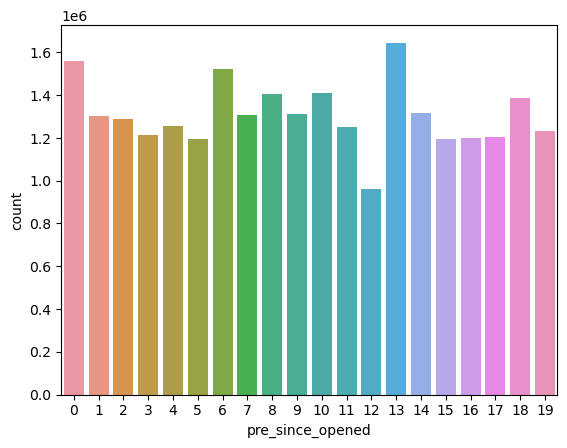

In [58]:
sns.countplot(x=df.pre_since_opened);

In [59]:
round(df.pre_since_confirmed.value_counts(normalize=True) * 100, 3).astype(str) + '%'

pre_since_confirmed
9     18.765%
6      7.447%
4       5.79%
17     5.747%
3      5.487%
14     5.391%
10     5.206%
13     5.022%
7      4.936%
1      4.759%
2      4.738%
8      4.719%
16     4.638%
0      4.558%
5      4.513%
12     4.238%
11     4.045%
15     0.001%
Name: proportion, dtype: object

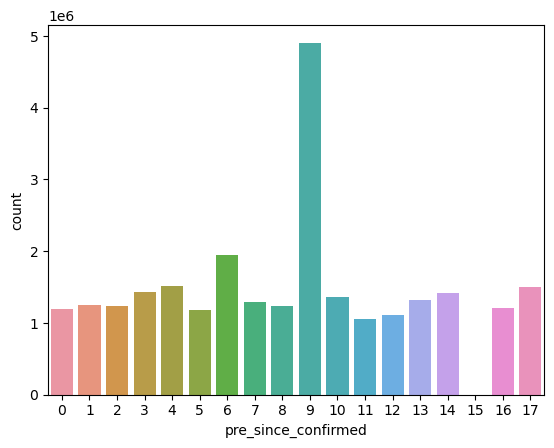

In [60]:
sns.countplot(x=df.pre_since_confirmed);

pre_pterm
4     17.033%
14     8.931%
2      5.857%
17     5.811%
1      5.669%
16     5.584%
11     5.468%
9      5.459%
6      5.351%
7       5.32%
0      5.016%
13     5.008%
8      4.999%
15     4.948%
12     4.608%
3      3.529%
10     1.406%
5      0.004%
Name: proportion, dtype: object


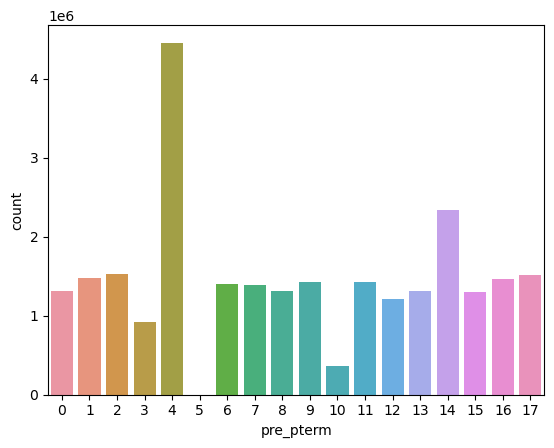

In [61]:
feature = 'pre_pterm'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

pre_fterm
8     23.716%
9      6.482%
0      6.107%
14     5.989%
6       5.71%
16     5.593%
7      5.582%
13     5.213%
15     5.059%
11     4.982%
1      4.615%
5      4.605%
10     4.586%
2      4.494%
12     3.955%
3       3.31%
4      0.001%
Name: proportion, dtype: object


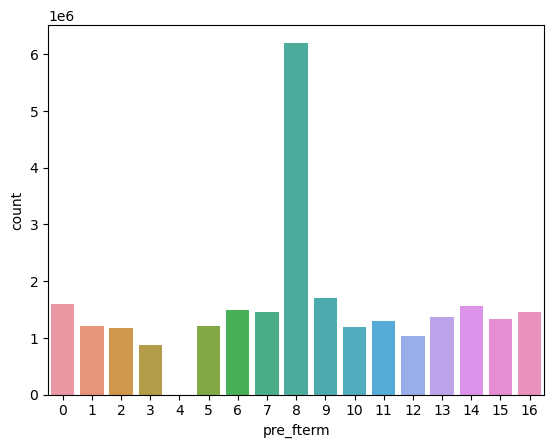

In [62]:
feature = 'pre_fterm'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

pre_till_pclose
1     18.771%
8      5.733%
13     5.605%
14     5.549%
12     5.511%
3      5.426%
6      5.332%
5      5.189%
9      5.074%
10      5.06%
16     5.035%
11      4.95%
4      4.828%
15     4.805%
0      4.764%
2      4.542%
7      3.825%
Name: proportion, dtype: object


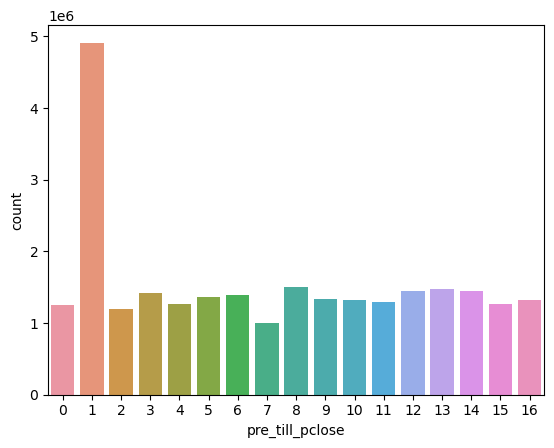

In [63]:
feature = 'pre_till_pclose'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

pre_till_fclose
11    27.072%
5      5.703%
3      5.696%
8      5.456%
10     5.266%
13       5.2%
1       5.07%
4      4.998%
7       4.97%
12     4.929%
0       4.87%
14     4.845%
9      4.815%
6       4.76%
15     4.427%
2      1.923%
Name: proportion, dtype: object


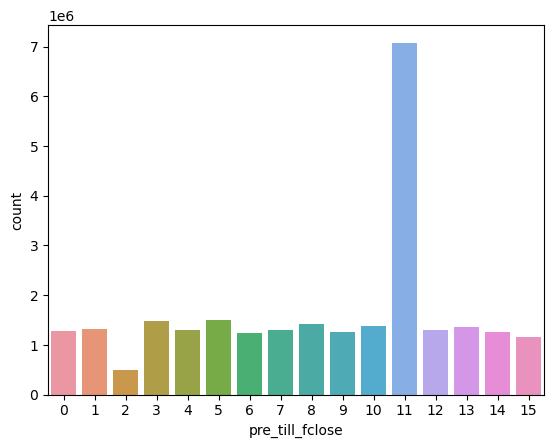

In [64]:
feature = 'pre_till_fclose'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

pre_loans_credit_limit
14    8.166%
19    5.577%
11    5.437%
15    5.395%
0     5.385%
7     5.286%
8     5.257%
2     5.224%
10    5.201%
16    5.169%
1      5.14%
17      5.1%
3     5.037%
12    5.036%
13    4.547%
5     4.503%
4     4.138%
6     4.096%
18    3.946%
9      2.36%
Name: proportion, dtype: object


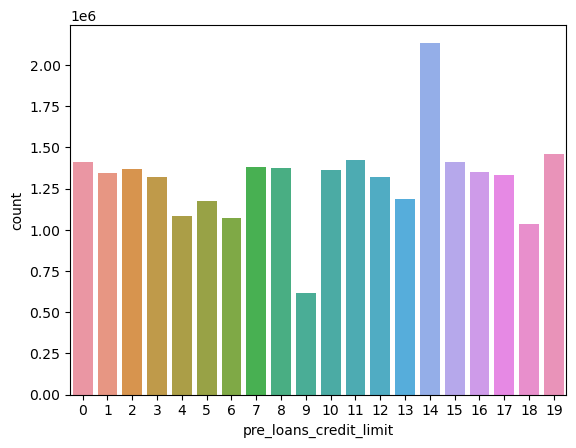

In [65]:
feature = 'pre_loans_credit_limit'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

pre_loans_next_pay_summ
2    67.948%
0      5.55%
5     5.498%
3     5.375%
1     5.284%
4     5.244%
6       5.1%
Name: proportion, dtype: object


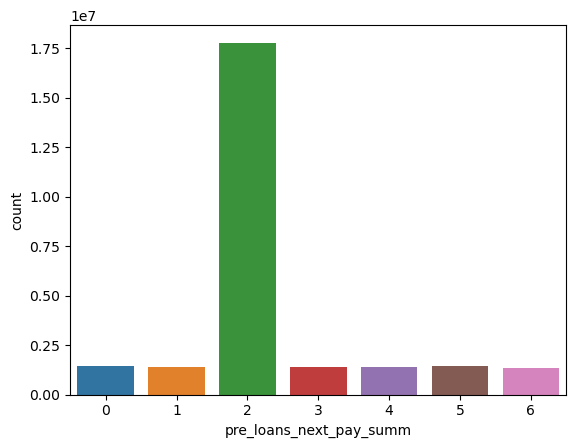

In [66]:
feature = 'pre_loans_next_pay_summ'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

pre_loans_outstanding
3    79.921%
1     5.133%
2     5.031%
5     4.992%
4     4.922%
Name: proportion, dtype: object


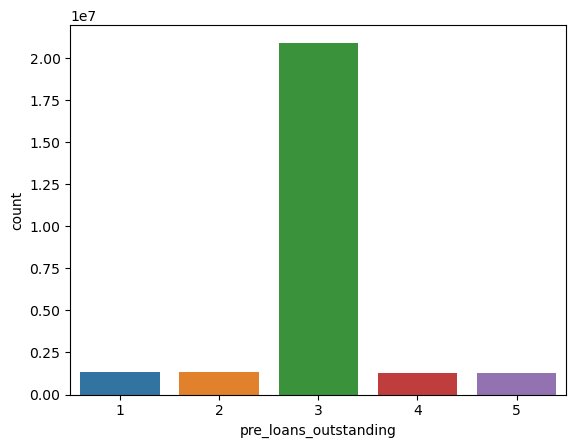

In [67]:
feature = 'pre_loans_outstanding'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

pre_loans_total_overdue
0    100.0%
1      0.0%
Name: proportion, dtype: object


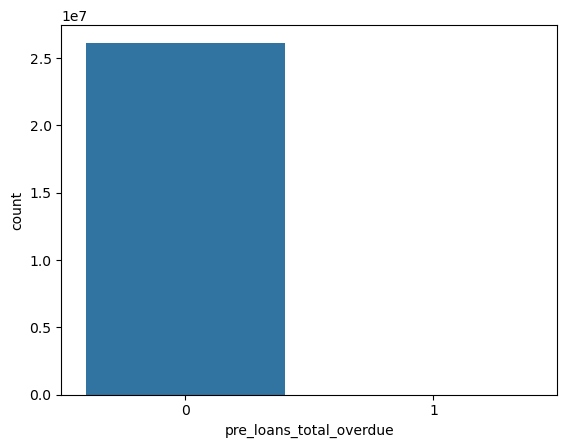

In [68]:
feature = 'pre_loans_total_overdue'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

In [5]:
# This feature can clearly be removed

pre_loans_max_overdue_sum
2    92.006%
3     4.257%
1     3.736%
0       0.0%
Name: proportion, dtype: object


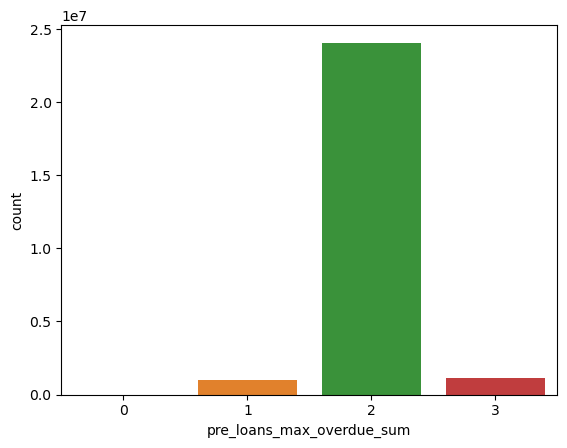

In [70]:
feature = 'pre_loans_max_overdue_sum'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

pre_loans_credit_cost_rate
4     26.828%
2     23.936%
3      6.262%
5      5.826%
9      5.258%
1      5.189%
7       5.18%
0       4.75%
11     4.645%
13     4.538%
8      3.775%
6      2.113%
10       1.7%
12       0.0%
Name: proportion, dtype: object


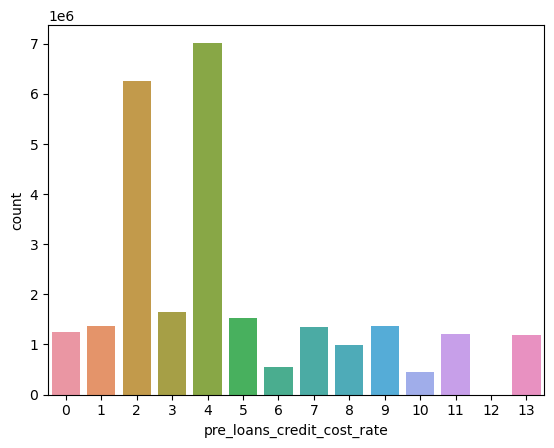

In [71]:
feature = 'pre_loans_credit_cost_rate'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

pre_loans5
6     99.452%
0      0.364%
3      0.111%
5      0.045%
2      0.017%
16     0.007%
13     0.002%
7      0.001%
1        0.0%
8        0.0%
9        0.0%
11       0.0%
10       0.0%
Name: proportion, dtype: object


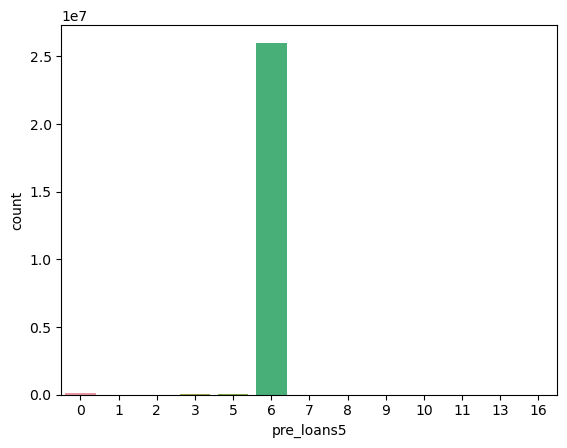

In [72]:
feature = 'pre_loans5'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

pre_loans530
16    97.662%
13     1.613%
0      0.422%
18     0.161%
6      0.073%
3      0.035%
2      0.017%
12     0.008%
15     0.003%
4      0.002%
14     0.001%
1      0.001%
10       0.0%
19       0.0%
7        0.0%
11       0.0%
5        0.0%
9        0.0%
8        0.0%
17       0.0%
Name: proportion, dtype: object


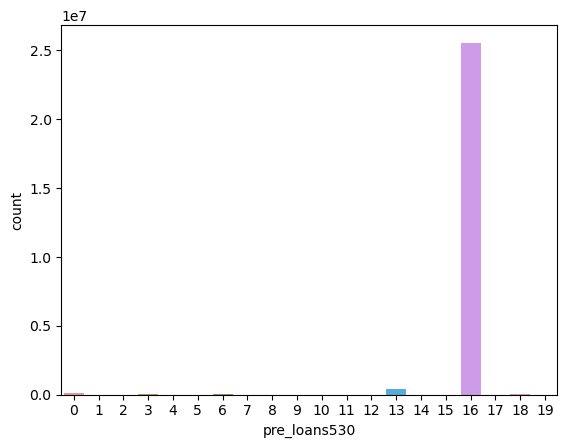

In [73]:
feature = 'pre_loans530'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

pre_loans3060
5    99.94%
8    0.049%
2    0.008%
7    0.002%
9      0.0%
1      0.0%
6      0.0%
0      0.0%
3      0.0%
4      0.0%
Name: proportion, dtype: object


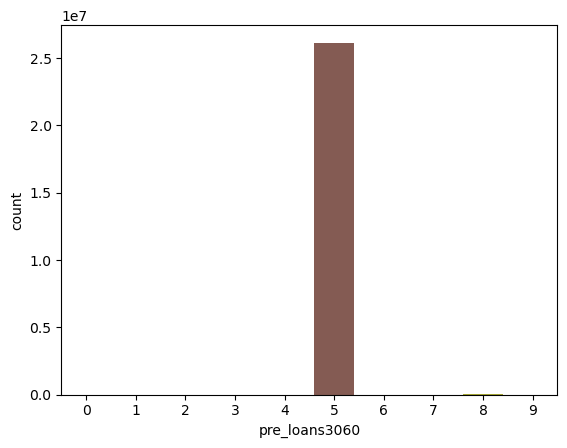

In [74]:
feature = 'pre_loans3060'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

pre_loans6090
4    99.995%
1     0.005%
2       0.0%
3       0.0%
0       0.0%
Name: proportion, dtype: object


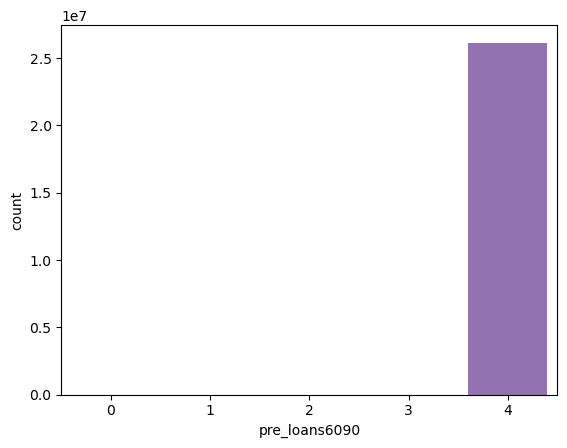

In [75]:
feature = 'pre_loans6090'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

pre_loans90
8     99.943%
14     0.044%
13     0.008%
19     0.003%
2      0.001%
10       0.0%
3        0.0%
Name: proportion, dtype: object


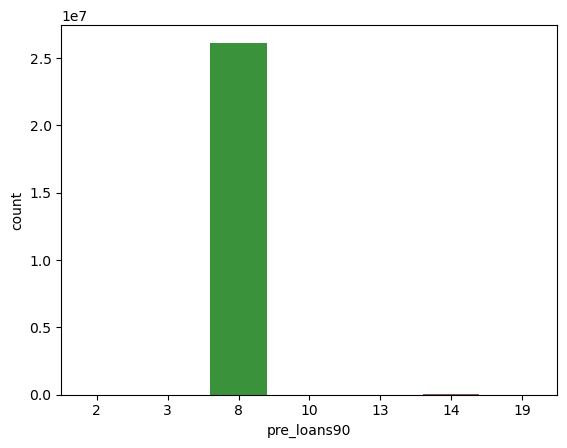

In [76]:
feature = 'pre_loans90'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

is_zero_loans5
1    91.871%
0     8.129%
Name: proportion, dtype: object


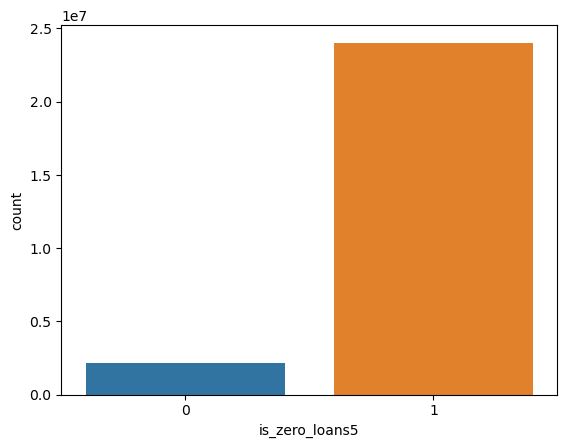

In [77]:
feature = 'is_zero_loans5'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

is_zero_loans530
1    83.221%
0    16.779%
Name: proportion, dtype: object


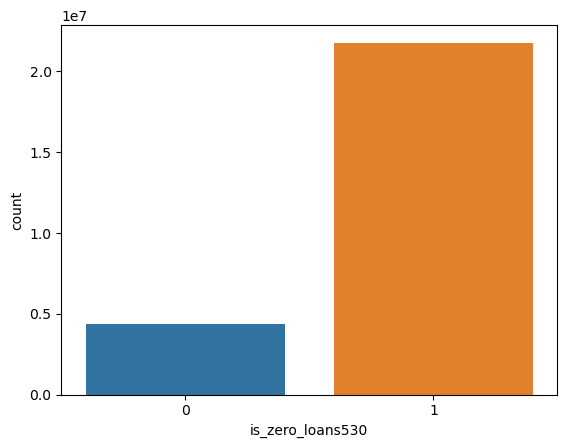

In [78]:
feature = 'is_zero_loans530'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

is_zero_loans3060
1    95.736%
0     4.264%
Name: proportion, dtype: object


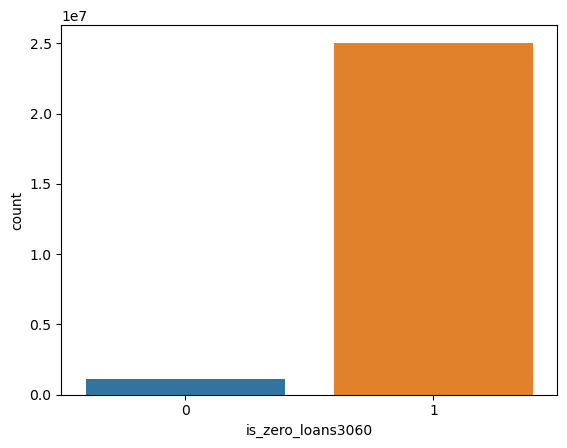

In [79]:
feature = 'is_zero_loans3060'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

is_zero_loans6090
1    97.543%
0     2.457%
Name: proportion, dtype: object


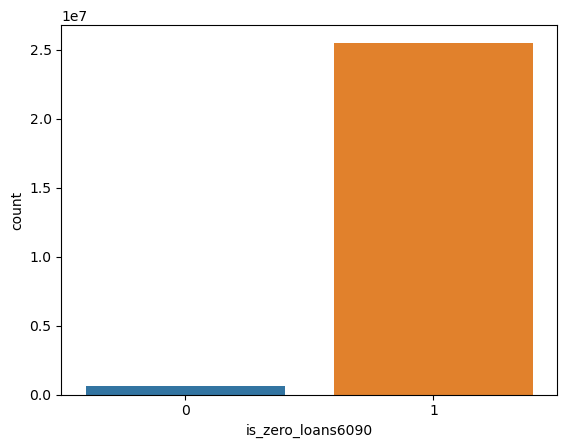

In [80]:
feature = 'is_zero_loans6090'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

is_zero_loans90
1    97.602%
0     2.398%
Name: proportion, dtype: object


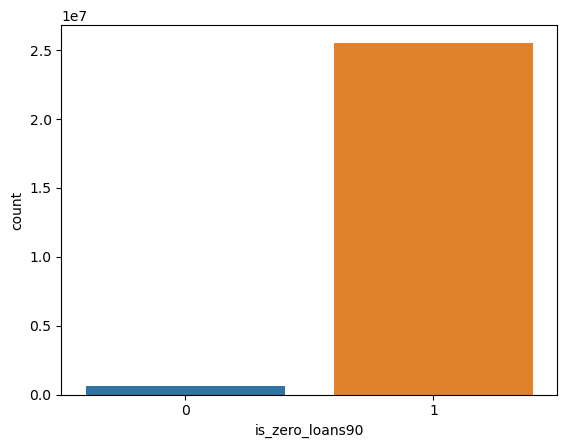

In [81]:
feature = 'is_zero_loans90'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

pre_util
16    71.091%
9      6.695%
3       3.68%
18     2.276%
6      1.864%
11     1.734%
15     1.453%
1       1.27%
7      1.107%
10     1.059%
0      1.044%
4      1.012%
12     0.977%
8      0.973%
19     0.923%
13      0.91%
2        0.9%
5      0.882%
17     0.102%
14     0.047%
Name: proportion, dtype: object


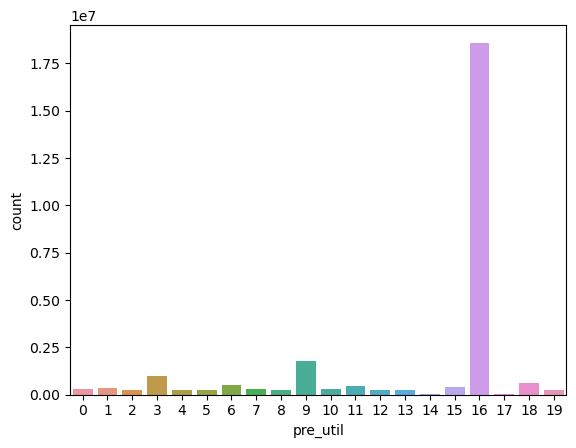

In [82]:
feature = 'pre_util'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

pre_over2limit
2     93.275%
5      6.563%
17     0.047%
6      0.027%
15     0.012%
4       0.01%
8      0.007%
14     0.005%
11     0.005%
13     0.005%
3      0.005%
19     0.004%
10     0.004%
12     0.004%
9      0.004%
0      0.004%
7      0.004%
1      0.004%
16     0.004%
18     0.004%
Name: proportion, dtype: object


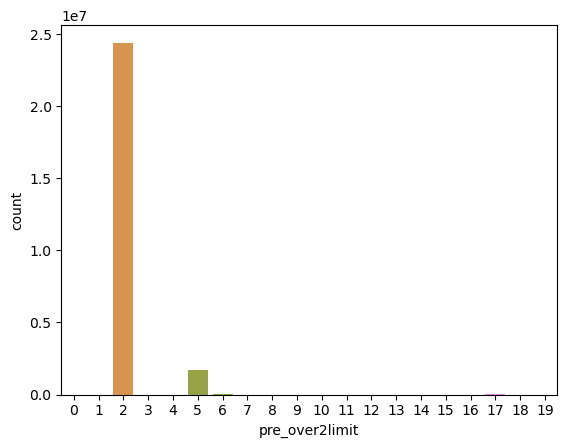

In [83]:
feature = 'pre_over2limit'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

pre_maxover2limit
17    89.844%
4       6.58%
3      2.183%
0      0.618%
11     0.279%
15     0.093%
5       0.09%
9       0.09%
16     0.036%
8      0.026%
14      0.02%
12     0.019%
13     0.018%
10     0.017%
19     0.016%
2      0.016%
7      0.016%
1      0.015%
18     0.013%
6      0.011%
Name: proportion, dtype: object


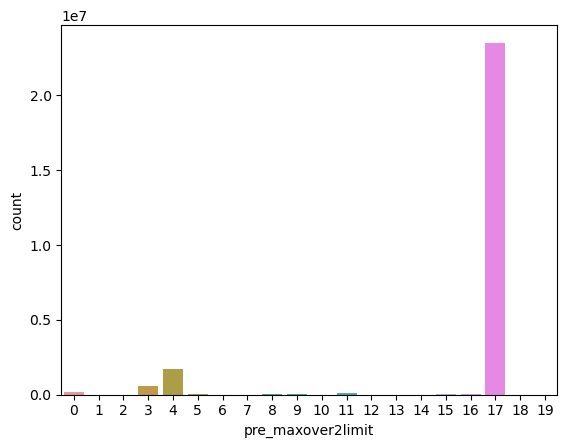

In [84]:
feature = 'pre_maxover2limit'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

is_zero_util
1    69.787%
0    30.213%
Name: proportion, dtype: object


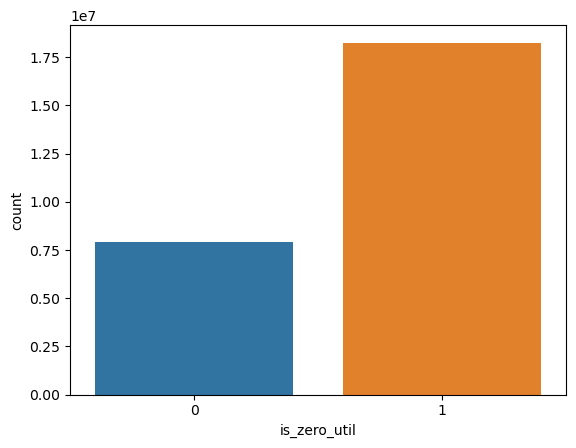

In [85]:
feature = 'is_zero_util'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

is_zero_over2limit
1    93.012%
0     6.988%
Name: proportion, dtype: object


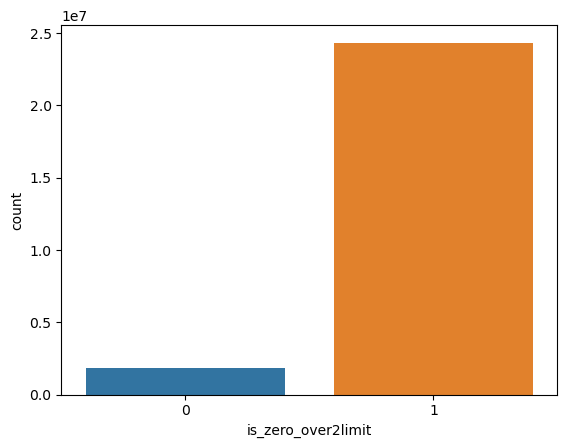

In [86]:
feature = 'is_zero_over2limit'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

is_zero_maxover2limit
1    85.557%
0    14.443%
Name: proportion, dtype: object


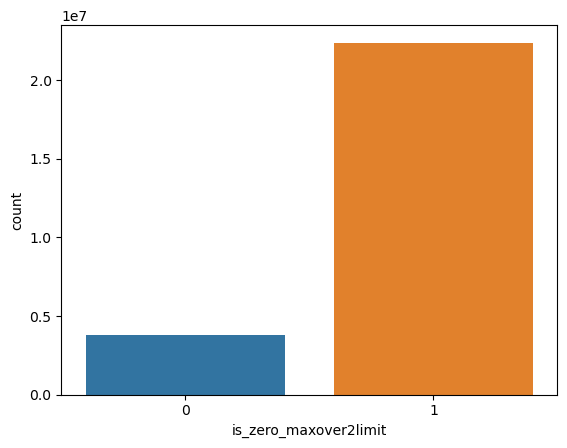

In [87]:
feature = 'is_zero_maxover2limit'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

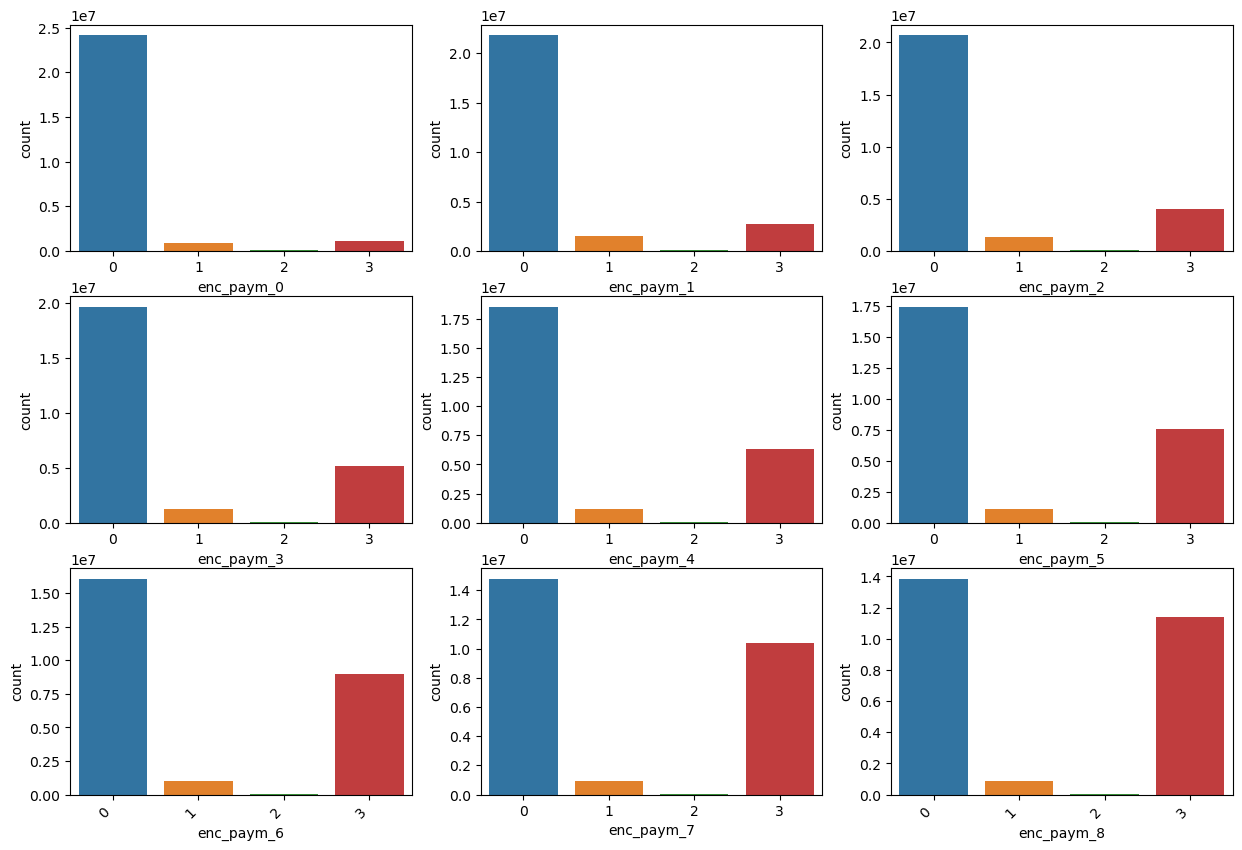

In [88]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

sns.countplot(x=df.enc_paym_0, ax=axes[0, 0]);
sns.countplot(x=df.enc_paym_1, ax=axes[0, 1]);
sns.countplot(x=df.enc_paym_2, ax=axes[0, 2]);

sns.countplot(x=df.enc_paym_3, ax=axes[1, 0]);
sns.countplot(x=df.enc_paym_4, ax=axes[1, 1]);
sns.countplot(x=df.enc_paym_5, ax=axes[1, 2]);

sns.countplot(x=df.enc_paym_6, ax=axes[2, 0]);
sns.countplot(x=df.enc_paym_7, ax=axes[2, 1]);
sns.countplot(x=df.enc_paym_8, ax=axes[2, 2]);
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=45, ha='right');
axes[2, 2].set_xticklabels(axes[2, 2].get_xticklabels(), rotation=45, ha='right');

In [181]:
pd.set_option('display.float_format', '{:.3f}'.format)

df[[
    "enc_paym_0", "enc_paym_1", "enc_paym_2",
    "enc_paym_3", "enc_paym_4", "enc_paym_5",
    "enc_paym_6", "enc_paym_7", "enc_paym_8"
]].describe()

,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8
count,26162717.000,26162717.000,26162717.000,26162717.000,26162717.000,26162717.000,26162717.000,26162717.000,26162717.000
mean,0.165,0.380,0.520,0.650,0.782,0.914,1.075,1.229,1.342
std,0.630,0.934,1.085,1.192,1.279,1.347,1.409,1.448,1.467
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.000,0.000,0.000,1.000,1.000,3.000,3.000,3.000,3.000
max,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000


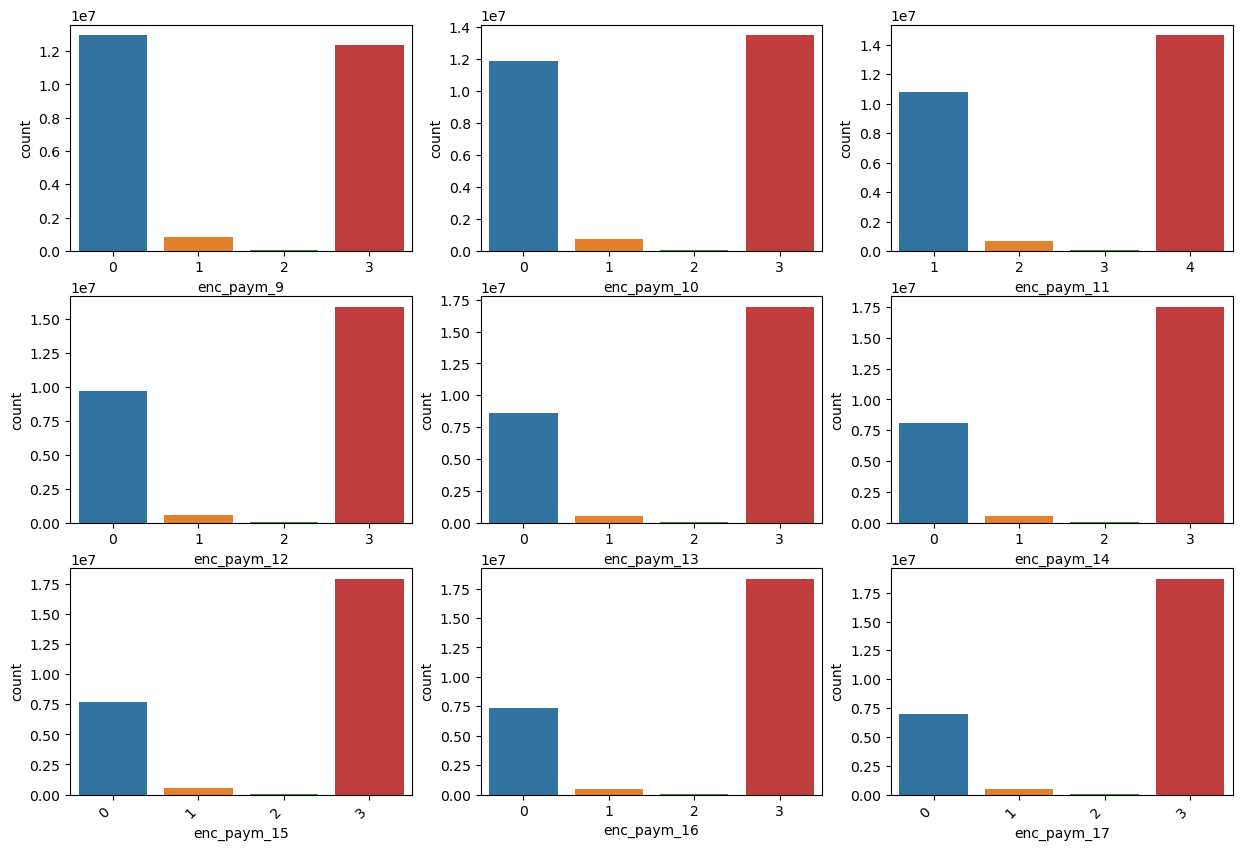

In [89]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

sns.countplot(x=df.enc_paym_9, ax=axes[0, 0]);
sns.countplot(x=df.enc_paym_10, ax=axes[0, 1]);
sns.countplot(x=df.enc_paym_11, ax=axes[0, 2]);

sns.countplot(x=df.enc_paym_12, ax=axes[1, 0]);
sns.countplot(x=df.enc_paym_13, ax=axes[1, 1]);
sns.countplot(x=df.enc_paym_14, ax=axes[1, 2]);

sns.countplot(x=df.enc_paym_15, ax=axes[2, 0]);
sns.countplot(x=df.enc_paym_16, ax=axes[2, 1]);
sns.countplot(x=df.enc_paym_17, ax=axes[2, 2]);
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=45, ha='right');
axes[2, 2].set_xticklabels(axes[2, 2].get_xticklabels(), rotation=45, ha='right');

In [183]:
df[[
    "enc_paym_9", "enc_paym_10", "enc_paym_11",
    "enc_paym_12", "enc_paym_13", "enc_paym_14",
    "enc_paym_15", "enc_paym_16", "enc_paym_17"
]].describe()

,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17
count,26162717.000,26162717.000,26162717.000,26162717.000,26162717.000,26162717.000,26162717.000,26162717.000,26162717.000
mean,1.451,1.579,2.709,1.843,1.965,2.029,2.078,2.123,2.164
std,1.477,1.478,1.467,1.443,1.410,1.388,1.369,1.350,1.331
min,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1.000,3.000,4.000,3.000,3.000,3.000,3.000,3.000,3.000
75%,3.000,3.000,4.000,3.000,3.000,3.000,3.000,3.000,3.000
max,3.000,3.000,4.000,3.000,3.000,3.000,3.000,3.000,3.000


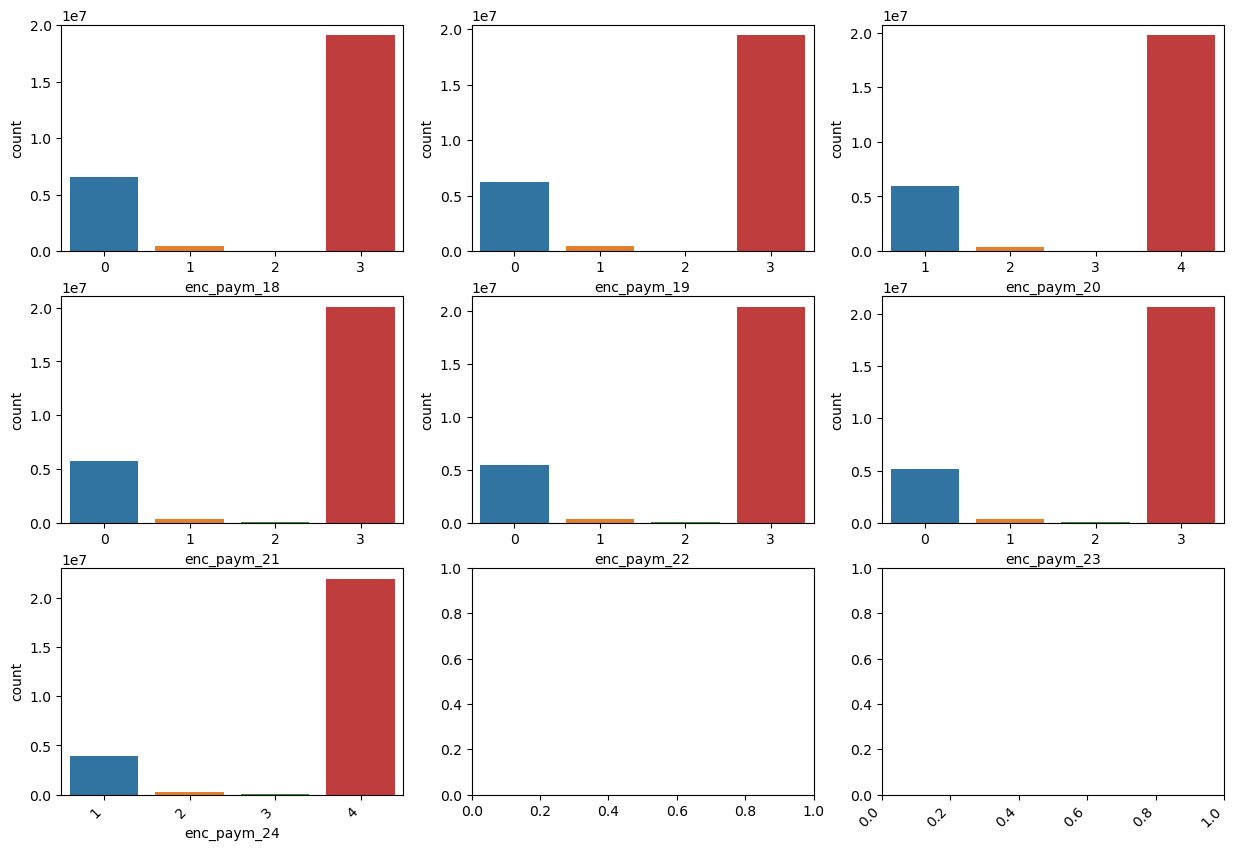

In [90]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

sns.countplot(x=df.enc_paym_18, ax=axes[0, 0]);
sns.countplot(x=df.enc_paym_19, ax=axes[0, 1]);
sns.countplot(x=df.enc_paym_20, ax=axes[0, 2]);

sns.countplot(x=df.enc_paym_21, ax=axes[1, 0]);
sns.countplot(x=df.enc_paym_22, ax=axes[1, 1]);
sns.countplot(x=df.enc_paym_23, ax=axes[1, 2]);

sns.countplot(x=df.enc_paym_24, ax=axes[2, 0]);

axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=45, ha='right');
axes[2, 2].set_xticklabels(axes[2, 2].get_xticklabels(), rotation=45, ha='right');

In [185]:
df[[
    "enc_paym_18", "enc_paym_19", "enc_paym_20",
    "enc_paym_21", "enc_paym_22", "enc_paym_23",
    "enc_paym_24"
]].describe()

,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24
count,26162717.000,26162717.000,26162717.000,26162717.000,26162717.000,26162717.000,26162717.000
mean,2.209,2.249,3.284,2.316,2.348,2.381,3.530
std,1.308,1.286,1.266,1.246,1.225,1.202,1.080
min,0.000,0.000,1.000,0.000,0.000,0.000,1.000
25%,0.000,1.000,4.000,3.000,3.000,3.000,4.000
50%,3.000,3.000,4.000,3.000,3.000,3.000,4.000
75%,3.000,3.000,4.000,3.000,3.000,3.000,4.000
max,3.000,3.000,4.000,3.000,3.000,3.000,4.000


enc_loans_account_holder_type
1    98.642%
3     0.814%
4     0.449%
6     0.079%
5     0.009%
2     0.008%
0       0.0%
Name: proportion, dtype: object


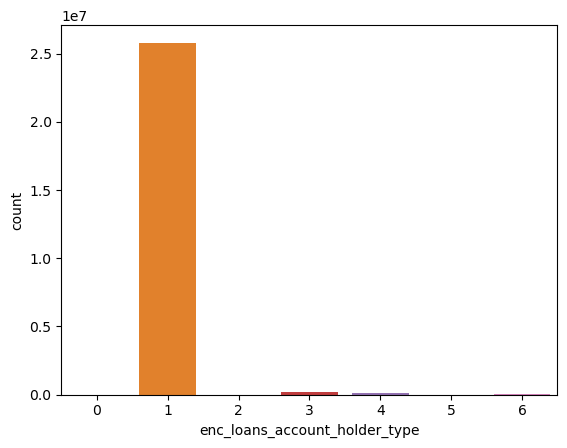

In [91]:
feature = 'enc_loans_account_holder_type'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

enc_loans_credit_status
3    67.125%
2    31.634%
4     0.772%
5     0.262%
1     0.186%
6     0.015%
0     0.008%
Name: proportion, dtype: object


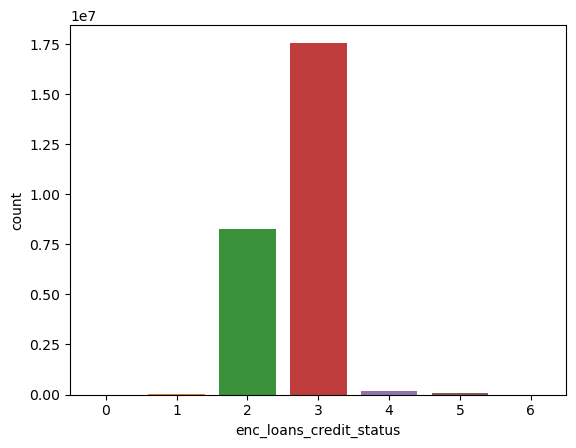

In [92]:
feature = 'enc_loans_credit_status'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

enc_loans_credit_type
4    56.473%
3     29.57%
5     4.015%
1     3.364%
0     2.891%
2      2.36%
7     1.186%
6     0.141%
Name: proportion, dtype: object


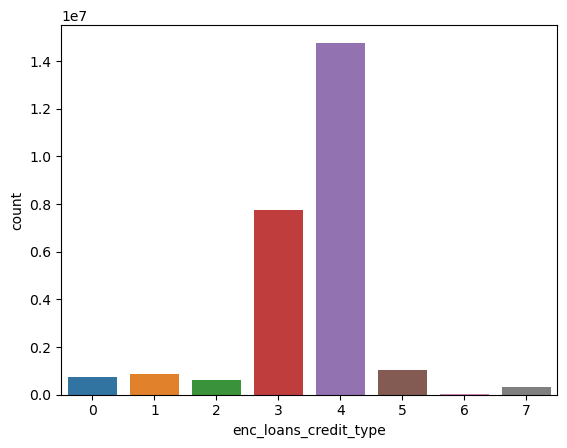

In [93]:
feature = 'enc_loans_credit_type'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

enc_loans_account_cur
1    99.764%
2     0.203%
0     0.033%
3     0.001%
Name: proportion, dtype: object


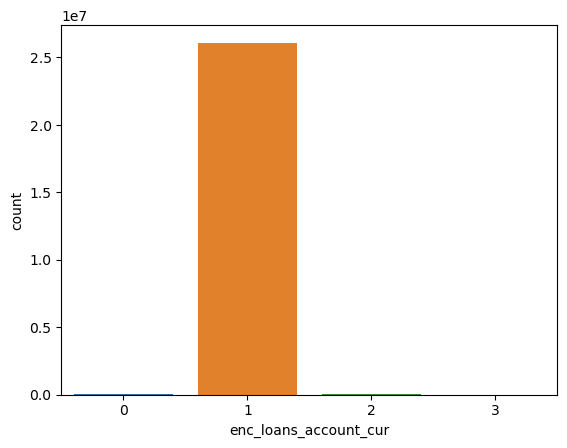

In [94]:
feature = 'enc_loans_account_cur'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

pclose_flag
0    85.08%
1    14.92%
Name: proportion, dtype: object


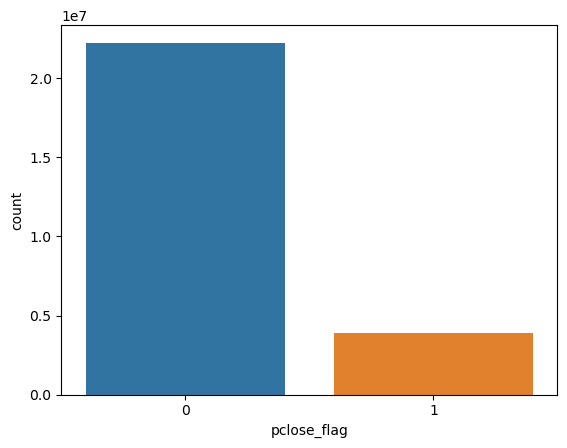

In [95]:
feature = 'pclose_flag'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

fclose_flag
0    77.103%
1    22.897%
Name: proportion, dtype: object


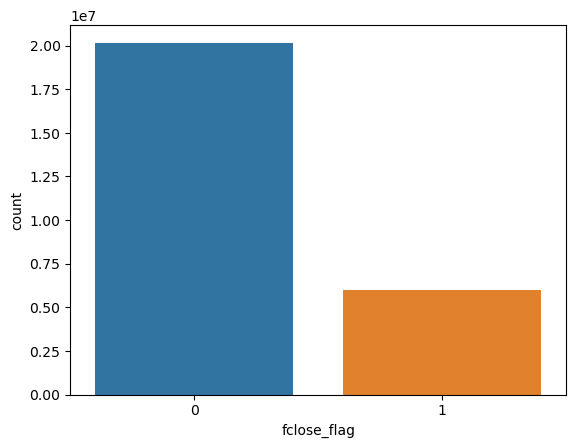

In [96]:
feature = 'fclose_flag'
print(round(df[feature].value_counts(normalize=True) * 100, 3).astype(str) + '%')
sns.countplot(x=df[feature]);

In [7]:
# All the data carries purely categorical meaning

In [9]:
# Overall, the percentage of clients who default is very small, which makes it difficult for the model to detect such cases  
# It will be necessary to look for non-linear patterns (features with more variability will help with this)

In [11]:
# Next, we can proceed with preparing the data for model building

# Data Preparation

In [13]:
# Let's try to remove the least informative columns

In [234]:
df2 = df.copy()

In [235]:
df2 = df.drop(columns=['pre_loans_total_overdue', 'pre_loans5', 'pre_loans530', 'pre_loans3060',
                       'pre_loans6090', 'pre_loans90', 'enc_loans_account_cur'])

In [15]:
# The remaining features are more or less diverse and informative, so they can be kept to help identify non-linear relationships in the data

In [17]:
# Split into training and test datasets

# Prepare the training data for model training  
# Then, based on the transformations applied to the training set, apply the same changes to the test set

In [19]:
# Add the target variable to the dataset

In [239]:
# df2 = df2.merge(df_target, how='left', on='id')

In [240]:
train_target, test_target = train_test_split(df_target, test_size=0.2, random_state=1)

In [241]:
print(round(train_target.flag.value_counts(normalize=True) * 100, 3).astype(str) + '%')

flag
0    96.449%
1     3.551%
Name: proportion, dtype: object


In [243]:
print(round(test_target.flag.value_counts(normalize=True) * 100, 3).astype(str) + '%')

flag
0    96.464%
1     3.536%
Name: proportion, dtype: object


In [244]:
train = df2.merge(train_target, how='inner', on='id')
test = df2.merge(test_target, how='inner', on='id')

In [245]:
features = list(train.columns)[2:-1]
features

['pre_since_opened',
 'pre_since_confirmed',
 'pre_pterm',
 'pre_fterm',
 'pre_till_pclose',
 'pre_till_fclose',
 'pre_loans_credit_limit',
 'pre_loans_next_pay_summ',
 'pre_loans_outstanding',
 'pre_loans_max_overdue_sum',
 'pre_loans_credit_cost_rate',
 'is_zero_loans5',
 'is_zero_loans530',
 'is_zero_loans3060',
 'is_zero_loans6090',
 'is_zero_loans90',
 'pre_util',
 'pre_over2limit',
 'pre_maxover2limit',
 'is_zero_util',
 'is_zero_over2limit',
 'is_zero_maxover2limit',
 'enc_paym_0',
 'enc_paym_1',
 'enc_paym_2',
 'enc_paym_3',
 'enc_paym_4',
 'enc_paym_5',
 'enc_paym_6',
 'enc_paym_7',
 'enc_paym_8',
 'enc_paym_9',
 'enc_paym_10',
 'enc_paym_11',
 'enc_paym_12',
 'enc_paym_13',
 'enc_paym_14',
 'enc_paym_15',
 'enc_paym_16',
 'enc_paym_17',
 'enc_paym_18',
 'enc_paym_19',
 'enc_paym_20',
 'enc_paym_21',
 'enc_paym_22',
 'enc_paym_23',
 'enc_paym_24',
 'enc_loans_account_holder_type',
 'enc_loans_credit_status',
 'enc_loans_credit_type',
 'pclose_flag',
 'fclose_flag']

In [23]:
# Apply target encoding: 
# for each category in a feature, calculate the mean target value on the training set and replace the category with this mean

In [255]:
for column in features:
    target_mean = train.groupby(column)['flag'].mean()
    
    train[f'{column}'] = train[column].map(target_mean)
    test[f'{column}'] = test[column].map(target_mean)
    
    global_mean = train['flag'].mean()
    test[f'{column}'].fillna(global_mean, inplace=True)

In [256]:
train.head(5)

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,pclose_flag,fclose_flag,flag
0,0,1,0.030,0.032,0.030,0.061,0.032,0.030,0.030,0.035,...,0.035,0.035,0.035,0.035,0.034,0.032,0.033,0.034,0.033,0
1,0,2,0.030,0.032,0.035,0.030,0.031,0.031,0.028,0.035,...,0.027,0.027,0.027,0.035,0.034,0.032,0.033,0.034,0.033,0
2,0,3,0.030,0.032,0.040,0.037,0.035,0.036,0.030,0.033,...,0.027,0.027,0.027,0.035,0.034,0.036,0.033,0.034,0.036,0
3,0,4,0.030,0.038,0.032,0.032,0.032,0.031,0.035,0.033,...,0.035,0.035,0.035,0.035,0.034,0.032,0.030,0.034,0.033,0
4,0,5,0.032,0.032,0.032,0.031,0.033,0.031,0.034,0.033,...,0.035,0.035,0.035,0.035,0.034,0.032,0.033,0.034,0.033,0


In [257]:
gc.collect()

8

In [258]:
train.head()

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,pclose_flag,fclose_flag,flag
0,0,1,0.030,0.032,0.030,0.061,0.032,0.030,0.030,0.035,...,0.035,0.035,0.035,0.035,0.034,0.032,0.033,0.034,0.033,0
1,0,2,0.030,0.032,0.035,0.030,0.031,0.031,0.028,0.035,...,0.027,0.027,0.027,0.035,0.034,0.032,0.033,0.034,0.033,0
2,0,3,0.030,0.032,0.040,0.037,0.035,0.036,0.030,0.033,...,0.027,0.027,0.027,0.035,0.034,0.036,0.033,0.034,0.036,0
3,0,4,0.030,0.038,0.032,0.032,0.032,0.031,0.035,0.033,...,0.035,0.035,0.035,0.035,0.034,0.032,0.030,0.034,0.033,0
4,0,5,0.032,0.032,0.032,0.031,0.033,0.031,0.034,0.033,...,0.035,0.035,0.035,0.035,0.034,0.032,0.033,0.034,0.033,0


In [259]:
test.head()

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,pclose_flag,fclose_flag,flag
0,12,1,0.027,0.038,0.032,0.030,0.040,0.041,0.038,0.033,...,0.027,0.027,0.027,0.027,0.034,0.032,0.033,0.034,0.033,0
1,12,2,0.028,0.031,0.026,0.030,0.026,0.040,0.038,0.033,...,0.027,0.027,0.027,0.035,0.034,0.032,0.033,0.034,0.033,0
2,12,3,0.028,0.031,0.026,0.031,0.026,0.030,0.032,0.033,...,0.027,0.027,0.027,0.027,0.034,0.032,0.033,0.034,0.033,0
3,12,4,0.028,0.032,0.040,0.032,0.035,0.029,0.040,0.033,...,0.035,0.035,0.035,0.035,0.034,0.032,0.033,0.034,0.033,0
4,12,5,0.028,0.032,0.040,0.037,0.035,0.036,0.030,0.033,...,0.027,0.027,0.027,0.035,0.034,0.036,0.033,0.034,0.036,0


In [260]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20931921 entries, 0 to 20931920
Data columns (total 55 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   id                             int32  
 1   rn                             int8   
 2   pre_since_opened               float64
 3   pre_since_confirmed            float64
 4   pre_pterm                      float64
 5   pre_fterm                      float64
 6   pre_till_pclose                float64
 7   pre_till_fclose                float64
 8   pre_loans_credit_limit         float64
 9   pre_loans_next_pay_summ        float64
 10  pre_loans_outstanding          float64
 11  pre_loans_max_overdue_sum      float64
 12  pre_loans_credit_cost_rate     float64
 13  is_zero_loans5                 float64
 14  is_zero_loans530               float64
 15  is_zero_loans3060              float64
 16  is_zero_loans6090              float64
 17  is_zero_loans90                float64
 18  

In [25]:
# We will use an Autoencoder for dimensionality reduction and noise elimination  
# (compressing credit histories into a single vector without significant loss of meaning)

# Create embeddings

In [83]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

feature_cols = [col for col in train.columns if col not in ["id", "rn", "flag"]]

# scaler = StandardScaler()
# train[feature_cols] = scaler.fit_transform(train[feature_cols])
# test[feature_cols] = scaler.transform(test[feature_cols])

T_max = 15
latent_dim = 48
batch_size = 512

Using device: cpu


In [84]:
start = time.time()

def prepare_data_by_id(df, features, T_max):
    data = {}
    for id_, group in df.groupby("id"):
        X = group.sort_values("rn")[features].values
        T, D = X.shape
        if T >= T_max:
            X = X[:T_max]
        else:
            pad = np.zeros((T_max - T, D))
            X = np.vstack([X, pad])
        data[id_] = X
    return data

class SimpleTensorDataset(Dataset):
    def __init__(self, data_dict):
        self.data = list(data_dict.items())

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        id_, X = self.data[idx]
        return torch.tensor(X, dtype=torch.float32), id_


prepared_data = prepare_data_by_id(train, feature_cols, T_max)
dataset = SimpleTensorDataset(prepared_data)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=0)

end = time.time()
res = (end - start) / 60
print('Time:', res)

Time: 31.381401999791464


In [85]:
class SimpleAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim)
        )

    def forward(self, x):
        B, T, D = x.shape
        x_flat = x.view(B, T * D)
        z = self.encoder(x_flat)
        x_hat = self.decoder(z).view(B, T, D)
        return z, x_hat

In [86]:
input_dim = T_max * len(feature_cols)
model = SimpleAE(input_dim=input_dim, latent_dim=latent_dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

all_time = []

for epoch in range(15):
    
    start = time.time()
    
    model.train()
    total_loss = 0
    for x_batch, _ in loader:
        x_batch = x_batch.to(device)
        z, x_hat = model(x_batch)
        loss = loss_fn(x_hat, x_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        total_loss += loss.item()
        
    end = time.time()
    res = (end - start) / 60
    all_time.append(res)
    print(f"Epoch {epoch+1} - Loss: {total_loss / len(loader):.4f}, ---- time for epoch: {res}")

sum(all_time)

Epoch 1 - Loss: 0.0000, ---- time for epoch: 1.5870424151420592
Epoch 2 - Loss: 0.0000, ---- time for epoch: 0.5771424849828084
Epoch 3 - Loss: 0.0000, ---- time for epoch: 0.5809084971745809
Epoch 4 - Loss: 0.0000, ---- time for epoch: 0.6114833950996399
Epoch 5 - Loss: 0.0000, ---- time for epoch: 0.592128849029541
Epoch 6 - Loss: 0.0000, ---- time for epoch: 0.5826203147570292
Epoch 7 - Loss: 0.0000, ---- time for epoch: 0.6000572800636291
Epoch 8 - Loss: 0.0000, ---- time for epoch: 0.5837882161140442
Epoch 9 - Loss: 0.0000, ---- time for epoch: 0.6047244985898336
Epoch 10 - Loss: 0.0000, ---- time for epoch: 0.5765131990114848
Epoch 11 - Loss: 0.0000, ---- time for epoch: 0.5922582666079204
Epoch 12 - Loss: 0.0000, ---- time for epoch: 0.5695206642150878
Epoch 13 - Loss: 0.0000, ---- time for epoch: 0.5514512777328491
Epoch 14 - Loss: 0.0000, ---- time for epoch: 0.545481816927592
Epoch 15 - Loss: 0.0000, ---- time for epoch: 0.5479366183280945


9.703057793776194

In [87]:
model.eval()
z_list = []
id_list = []

with torch.no_grad():
    for x_batch, id_batch in DataLoader(dataset, batch_size=batch_size, num_workers=0):
        x_batch = x_batch.to(device)
        z, _ = model(x_batch)
        z_list.append(z.cpu())
        id_list.extend(id_batch)

z_all = torch.cat(z_list).numpy()
df_z = pd.DataFrame(z_all, columns=[f"z_{i}" for i in range(latent_dim)])
df_z["id"] = id_list

In [88]:
df_z.head()

,z_0,z_1,z_2,z_3,z_4,z_5,z_6,z_7,z_8,z_9,...,z_39,z_40,z_41,z_42,z_43,z_44,z_45,z_46,z_47,id
0,-0.000543,0.002677,-0.030597,-0.028109,0.173719,0.016427,0.080412,0.021884,0.058940,0.039422,...,0.035863,-0.037074,-0.007882,-0.016981,0.007007,-0.016134,-0.005169,0.009797,-0.068012,tensor(0)
1,-0.003476,-0.015725,-0.041245,-0.027062,0.243435,0.091018,0.027963,-0.013065,-0.010849,0.061296,...,0.028608,0.013616,-0.022928,0.015365,-0.016429,0.072038,-0.024205,0.051364,-0.165058,tensor(1)
2,0.015818,-0.041958,0.018554,0.002600,0.054361,-0.005898,0.005982,0.013239,0.040674,0.003651,...,0.021251,0.037708,0.000258,-0.025827,-0.000433,0.016487,0.005244,-0.000406,0.022985,tensor(2)
3,-0.009083,0.008315,0.065074,0.025630,0.263807,-0.011281,-0.043644,-0.048511,-0.061264,0.019753,...,-0.054334,0.030248,0.026983,0.098186,0.002825,0.077152,-0.007429,-0.013177,-0.183443,tensor(3)
4,-0.026571,0.027930,0.070042,-0.035007,0.193839,-0.045489,-0.075486,0.002011,-0.003176,0.061627,...,0.119546,-0.023159,-0.027352,-0.013183,0.024447,0.039809,-0.004631,-0.065793,0.108617,tensor(4)


In [89]:
df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 49 columns):
 #   Column  Dtype  
---  ------  -----  
 0   z_0     float32
 1   z_1     float32
 2   z_2     float32
 3   z_3     float32
 4   z_4     float32
 5   z_5     float32
 6   z_6     float32
 7   z_7     float32
 8   z_8     float32
 9   z_9     float32
 10  z_10    float32
 11  z_11    float32
 12  z_12    float32
 13  z_13    float32
 14  z_14    float32
 15  z_15    float32
 16  z_16    float32
 17  z_17    float32
 18  z_18    float32
 19  z_19    float32
 20  z_20    float32
 21  z_21    float32
 22  z_22    float32
 23  z_23    float32
 24  z_24    float32
 25  z_25    float32
 26  z_26    float32
 27  z_27    float32
 28  z_28    float32
 29  z_29    float32
 30  z_30    float32
 31  z_31    float32
 32  z_32    float32
 33  z_33    float32
 34  z_34    float32
 35  z_35    float32
 36  z_36    float32
 37  z_37    float32
 38  z_38    float32
 39  z_39    float32
 40  

In [90]:
df_z['id'] = df_z['id'].astype('int')

In [27]:
# Now apply the model to the test data

In [92]:
prepared_test = prepare_data_by_id(test, feature_cols, T_max)
dataset_test = SimpleTensorDataset(prepared_test)
loader_test = DataLoader(dataset_test, batch_size=batch_size, num_workers=0)

model.eval()
z_list = []
id_list = []

with torch.no_grad():
    for x_batch, id_batch in loader_test:
        x_batch = x_batch.to(device)
        z, _ = model(x_batch)
        z_list.append(z.cpu())
        id_list.extend(id_batch)

z_all = torch.cat(z_list).numpy()
df_z_test = pd.DataFrame(z_all, columns=[f"z_{i}" for i in range(latent_dim)])
df_z_test["id"] = id_list

In [93]:
df_z_test['id'] = df_z_test['id'].astype('int')

In [94]:
df_z_train = df_z.merge(train_target, how='inner', on='id')
df_z_test = df_z_test.merge(test_target, how='inner', on='id')

In [95]:
df_rn = df2.groupby('id')['rn'].max().reset_index()
df_rn.columns

Index(['id', 'rn'], dtype='object')

In [96]:
df_z_train = df_z_train.merge(df_rn, how='inner', on='id')
df_z_test = df_z_test.merge(df_rn, how='inner', on='id')

In [97]:
df_z_train.head()

,z_0,z_1,z_2,z_3,z_4,z_5,z_6,z_7,z_8,z_9,...,z_41,z_42,z_43,z_44,z_45,z_46,z_47,id,flag,rn
0,-0.000543,0.002677,-0.030597,-0.028109,0.173719,0.016427,0.080412,0.021884,0.058940,0.039422,...,-0.007882,-0.016981,0.007007,-0.016134,-0.005169,0.009797,-0.068012,0,0,10
1,-0.003476,-0.015725,-0.041245,-0.027062,0.243435,0.091018,0.027963,-0.013065,-0.010849,0.061296,...,-0.022928,0.015365,-0.016429,0.072038,-0.024205,0.051364,-0.165058,1,0,14
2,0.015818,-0.041958,0.018554,0.002600,0.054361,-0.005898,0.005982,0.013239,0.040674,0.003651,...,0.000258,-0.025827,-0.000433,0.016487,0.005244,-0.000406,0.022985,2,0,3
3,-0.009083,0.008315,0.065074,0.025630,0.263807,-0.011281,-0.043644,-0.048511,-0.061264,0.019753,...,0.026983,0.098186,0.002825,0.077152,-0.007429,-0.013177,-0.183443,3,0,15
4,-0.026571,0.027930,0.070042,-0.035007,0.193839,-0.045489,-0.075486,0.002011,-0.003176,0.061627,...,-0.027352,-0.013183,0.024447,0.039809,-0.004631,-0.065793,0.108617,4,0,1


In [98]:
df_z_test.head()

,z_0,z_1,z_2,z_3,z_4,z_5,z_6,z_7,z_8,z_9,...,z_41,z_42,z_43,z_44,z_45,z_46,z_47,id,flag,rn
0,0.039755,0.000845,-0.069763,0.013612,0.244134,0.045276,-0.005989,0.015741,0.064358,0.042789,...,-0.030457,-0.091340,0.006339,0.044925,-0.000400,0.033366,-0.107168,12,0,12
1,0.006946,0.036024,-0.029395,0.022136,0.083369,-0.007184,0.016036,0.020567,0.032862,-0.039570,...,0.034107,-0.020498,0.000711,-0.027693,0.058847,-0.017989,-0.000086,14,0,5
2,0.005870,0.000225,-0.047022,0.059530,0.170094,-0.024957,0.009369,0.003750,0.053094,0.018018,...,-0.007179,-0.058760,0.004409,-0.028489,-0.013520,-0.024672,-0.055469,15,0,9
3,0.004574,-0.039301,0.031134,-0.004391,0.066269,-0.013864,0.006650,0.017328,0.041616,0.003222,...,-0.004530,-0.007868,-0.008429,0.018067,0.002396,-0.015479,0.052021,16,0,3
4,-0.016927,0.024274,0.067214,-0.034171,0.192933,-0.045620,-0.079342,0.008139,-0.001160,0.059316,...,-0.024554,-0.012162,0.019422,0.042454,-0.003807,-0.064753,0.110731,18,0,1


In [29]:
# I also tried creating lags

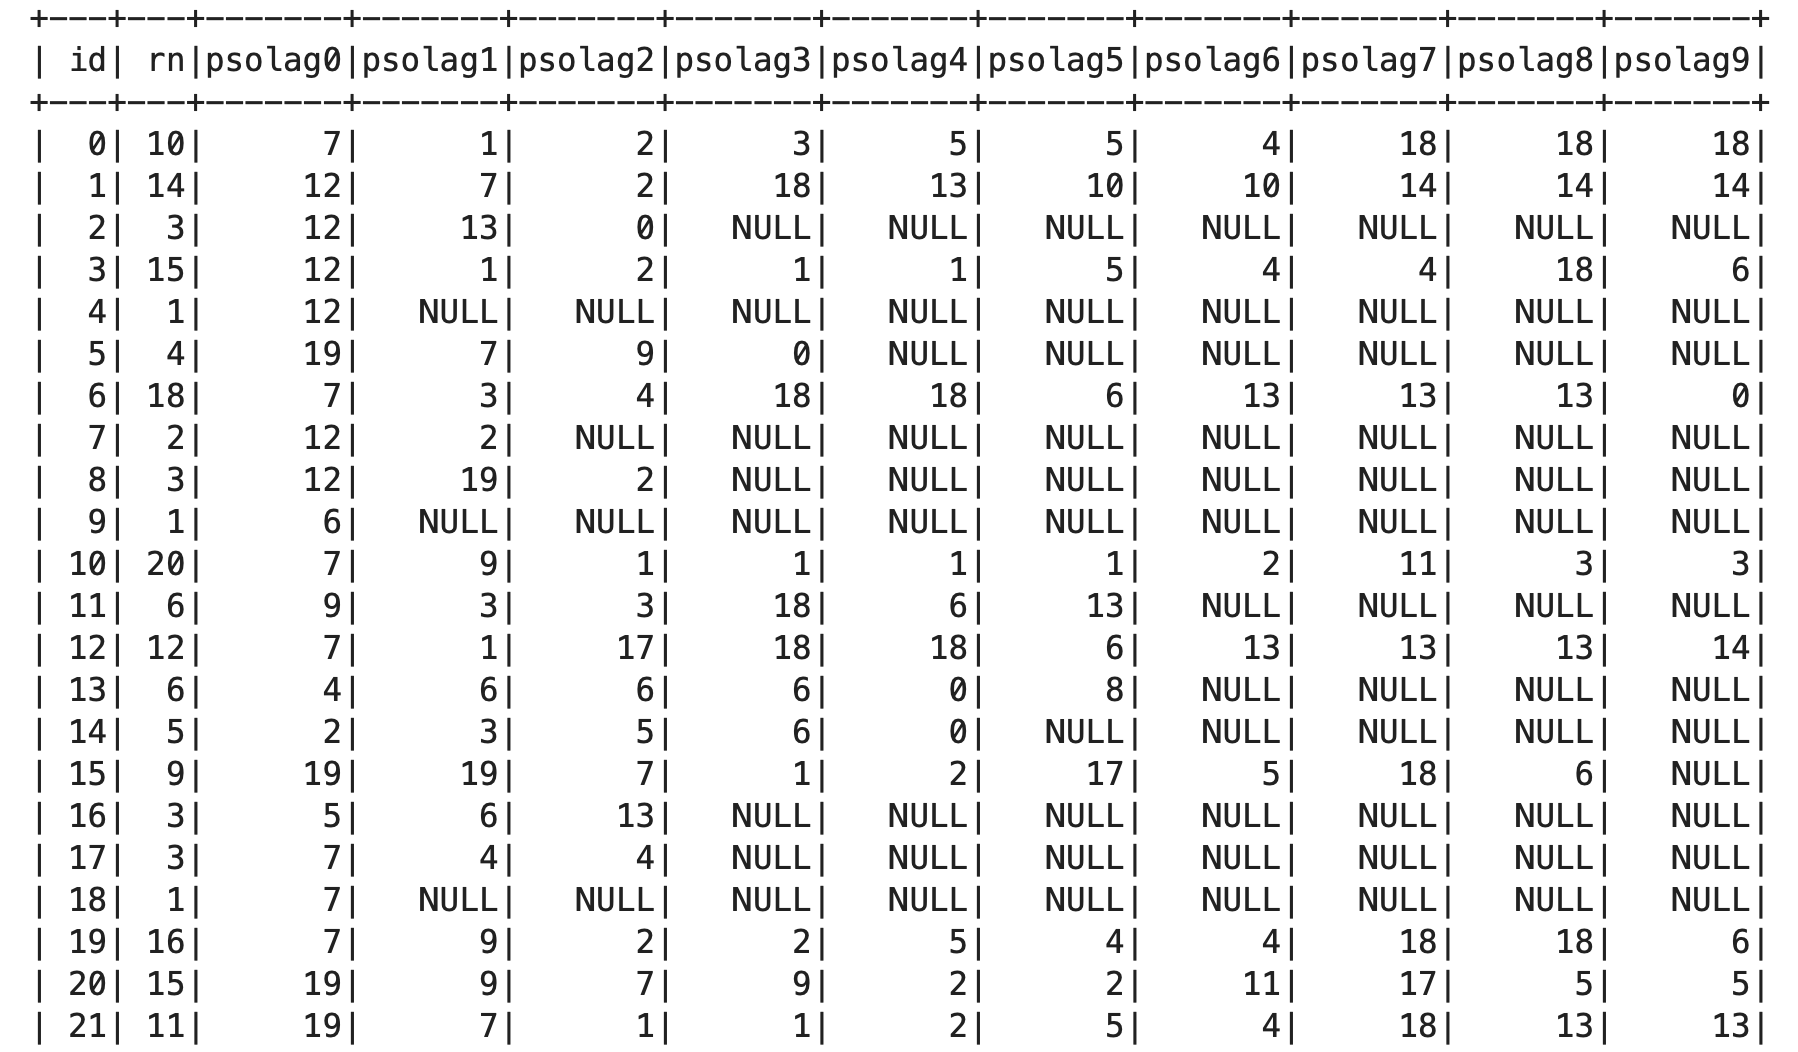

In [31]:
# This concludes the data preparation stage, and we can now proceed to creating new features

In [33]:
# Save the final DataFrames to separate files

In [101]:
df_z_train.to_csv('TRAIN AND TEST FOLDER/df_z_train.csv', index=False)
df_z_test.to_csv('TRAIN AND TEST FOLDER/df_z_test.csv', index=False)

# Feature engineering

In [ ]:
# df_z_train = pd.read_csv('TRAIN AND TEST FOLDER/df_z_train.csv')
# df_z_test = pd.read_csv('TRAIN AND TEST FOLDER/df_z_test.csv')

In [35]:
# Create features that reflect the frequency of values in specific categories within each client's credit history

In [208]:
features_inp = ['pre_since_opened', 'pre_since_confirmed','pre_pterm','pre_fterm','pre_till_pclose','pre_till_fclose',
                'pre_loans_credit_limit','pre_loans_next_pay_summ','pre_loans_outstanding','pre_loans_total_overdue',
                'pre_loans_max_overdue_sum','pre_loans_credit_cost_rate','pre_loans5','pre_loans530','pre_loans3060',
                'pre_loans6090','pre_loans90','is_zero_loans5','is_zero_loans530','is_zero_loans3060','is_zero_loans6090',
                'is_zero_loans90','pre_util','pre_over2limit','pre_maxover2limit','is_zero_util','is_zero_over2limit',
                'is_zero_maxover2limit','enc_paym_0','enc_paym_1','enc_paym_22','enc_paym_23','enc_paym_24',
                'enc_loans_account_holder_type','enc_loans_credit_status','enc_loans_credit_type','pclose_flag','fclose_flag']

In [209]:
df.columns

Index(['id', 'rn', 'pre_since_opened', 'pre_since_confirmed', 'pre_pterm',
       'pre_fterm', 'pre_till_pclose', 'pre_till_fclose',
       'pre_loans_credit_limit', 'pre_loans_next_pay_summ',
       'pre_loans_outstanding', 'pre_loans_total_overdue',
       'pre_loans_max_overdue_sum', 'pre_loans_credit_cost_rate', 'pre_loans5',
       'pre_loans530', 'pre_loans3060', 'pre_loans6090', 'pre_loans90',
       'is_zero_loans5', 'is_zero_loans530', 'is_zero_loans3060',
       'is_zero_loans6090', 'is_zero_loans90', 'pre_util', 'pre_over2limit',
       'pre_maxover2limit', 'is_zero_util', 'is_zero_over2limit',
       'is_zero_maxover2limit', 'enc_paym_0', 'enc_paym_1', 'enc_paym_2',
       'enc_paym_3', 'enc_paym_4', 'enc_paym_5', 'enc_paym_6', 'enc_paym_7',
       'enc_paym_8', 'enc_paym_9', 'enc_paym_10', 'enc_paym_11', 'enc_paym_12',
       'enc_paym_13', 'enc_paym_14', 'enc_paym_15', 'enc_paym_16',
       'enc_paym_17', 'enc_paym_18', 'enc_paym_19', 'enc_paym_20',
       'enc_paym_21', 

In [210]:
df3 = df_target.drop(columns='flag')

In [211]:
for name in features_inp:
    df_freq = df.groupby(['id', name]).size().reset_index(name='cnt')
    df_freq['total'] = df_freq.groupby('id')['cnt'].transform('sum')
    df_freq['percent'] = (df_freq['cnt'] / df_freq['total']).round(3).astype('float32')
    df_pivot = df_freq.pivot(index='id', columns=name, values='percent').fillna(0)
    df_pivot.columns = [f"{name}_{col}" for col in df_pivot.columns]
    df3 = df3.merge(df_pivot, on='id', how='left')

In [212]:
gc.collect()

514

In [213]:
df3.head()

,id,pre_since_opened_0,pre_since_opened_1,pre_since_opened_2,pre_since_opened_3,pre_since_opened_4,pre_since_opened_5,pre_since_opened_6,pre_since_opened_7,pre_since_opened_8,...,enc_loans_credit_type_2,enc_loans_credit_type_3,enc_loans_credit_type_4,enc_loans_credit_type_5,enc_loans_credit_type_6,enc_loans_credit_type_7,pclose_flag_0,pclose_flag_1,fclose_flag_0,fclose_flag_1
0,0,0.000,0.100,0.100,0.100,0.100,0.200,0.000,0.100,0.000,...,0.000,0.200,0.700,0.000,0.000,0.000,0.900,0.100,0.800,0.200
1,1,0.000,0.000,0.071,0.000,0.000,0.000,0.000,0.071,0.143,...,0.000,0.214,0.571,0.000,0.000,0.000,0.929,0.071,0.857,0.143
2,2,0.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.667,0.333,0.000,0.000,0.000,0.333,0.667,0.333,0.667
3,3,0.000,0.200,0.067,0.000,0.133,0.067,0.200,0.000,0.000,...,0.000,0.267,0.600,0.067,0.000,0.000,0.667,0.333,0.600,0.400
4,4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000


In [37]:
# Add df3 to both the train and test datasets

In [215]:
df_z_train = df_z_train.merge(df3, how='inner', on='id')
df_z_test = df_z_test.merge(df3, how='inner', on='id')

In [216]:
del df3
del df_freq
del df_pivot

In [217]:
gc.collect()

0

In [218]:
df_z_train.head()

,z_0,z_1,z_2,z_3,z_4,z_5,z_6,z_7,z_8,z_9,...,enc_loans_credit_type_2,enc_loans_credit_type_3,enc_loans_credit_type_4,enc_loans_credit_type_5,enc_loans_credit_type_6,enc_loans_credit_type_7,pclose_flag_0,pclose_flag_1,fclose_flag_0,fclose_flag_1
0,-0.001,0.003,-0.031,-0.028,0.174,0.016,0.080,0.022,0.059,0.039,...,0.000,0.200,0.700,0.000,0.000,0.000,0.900,0.100,0.800,0.200
1,-0.003,-0.016,-0.041,-0.027,0.243,0.091,0.028,-0.013,-0.011,0.061,...,0.000,0.214,0.571,0.000,0.000,0.000,0.929,0.071,0.857,0.143
2,0.016,-0.042,0.019,0.003,0.054,-0.006,0.006,0.013,0.041,0.004,...,0.000,0.667,0.333,0.000,0.000,0.000,0.333,0.667,0.333,0.667
3,-0.009,0.008,0.065,0.026,0.264,-0.011,-0.044,-0.049,-0.061,0.020,...,0.000,0.267,0.600,0.067,0.000,0.000,0.667,0.333,0.600,0.400
4,-0.027,0.028,0.070,-0.035,0.194,-0.045,-0.075,0.002,-0.003,0.062,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000


In [39]:
# Also try adding features that represent the mean value per ID after target encoding

In [265]:
cols_to_agg = list(train.columns)[2:-1]
train_mean = train.groupby('id')[cols_to_agg].mean().reset_index()
test_mean = test.groupby('id')[cols_to_agg].mean().reset_index()

In [266]:
train_mean.head()

,id,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,...,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,pclose_flag,fclose_flag
0,0,0.033,0.033,0.032,0.038,0.033,0.034,0.030,0.032,0.034,...,0.034,0.034,0.034,0.033,0.035,0.034,0.034,0.032,0.034,0.034
1,1,0.032,0.031,0.032,0.031,0.032,0.031,0.034,0.033,0.034,...,0.033,0.033,0.035,0.033,0.033,0.034,0.033,0.032,0.034,0.033
2,2,0.040,0.031,0.037,0.035,0.033,0.034,0.035,0.035,0.037,...,0.038,0.038,0.038,0.038,0.035,0.034,0.035,0.033,0.034,0.035
3,3,0.034,0.034,0.035,0.033,0.037,0.036,0.036,0.034,0.035,...,0.031,0.031,0.031,0.031,0.032,0.034,0.034,0.035,0.034,0.034
4,4,0.062,0.032,0.040,0.037,0.035,0.036,0.035,0.036,0.032,...,0.035,0.035,0.035,0.035,0.035,0.034,0.036,0.033,0.034,0.036


In [267]:
df_z_train = df_z_train.merge(train_mean, how='left', on='id')
df_z_test = df_z_test.merge(test_mean, how='left', on='id')

In [268]:
df_z_train.head()

,z_0,z_1,z_2,z_3,z_4,z_5,z_6,z_7,z_8,z_9,...,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,pclose_flag,fclose_flag
0,-0.001,0.003,-0.031,-0.028,0.174,0.016,0.080,0.022,0.059,0.039,...,0.034,0.034,0.034,0.033,0.035,0.034,0.034,0.032,0.034,0.034
1,-0.003,-0.016,-0.041,-0.027,0.243,0.091,0.028,-0.013,-0.011,0.061,...,0.033,0.033,0.035,0.033,0.033,0.034,0.033,0.032,0.034,0.033
2,0.016,-0.042,0.019,0.003,0.054,-0.006,0.006,0.013,0.041,0.004,...,0.038,0.038,0.038,0.038,0.035,0.034,0.035,0.033,0.034,0.035
3,-0.009,0.008,0.065,0.026,0.264,-0.011,-0.044,-0.049,-0.061,0.020,...,0.031,0.031,0.031,0.031,0.032,0.034,0.034,0.035,0.034,0.034
4,-0.027,0.028,0.070,-0.035,0.194,-0.045,-0.075,0.002,-0.003,0.062,...,0.035,0.035,0.035,0.035,0.035,0.034,0.036,0.033,0.034,0.036


In [41]:
# Try adding several new features based on the strongest correlations with the target

In [282]:
cols = list(df_z_train.columns)[:48]
cols

['z_0',
 'z_1',
 'z_2',
 'z_3',
 'z_4',
 'z_5',
 'z_6',
 'z_7',
 'z_8',
 'z_9',
 'z_10',
 'z_11',
 'z_12',
 'z_13',
 'z_14',
 'z_15',
 'z_16',
 'z_17',
 'z_18',
 'z_19',
 'z_20',
 'z_21',
 'z_22',
 'z_23',
 'z_24',
 'z_25',
 'z_26',
 'z_27',
 'z_28',
 'z_29',
 'z_30',
 'z_31',
 'z_32',
 'z_33',
 'z_34',
 'z_35',
 'z_36',
 'z_37',
 'z_38',
 'z_39',
 'z_40',
 'z_41',
 'z_42',
 'z_43',
 'z_44',
 'z_45',
 'z_46',
 'z_47']

In [284]:
start = time.time()

results = []

for y in cols:
    local = []
    for x in cols:
        if x != 'flag' and y != 'flag':
            df_z_train['log_feature'] = np.log1p((df_z_train[x]) * (df_z_train[y]))
            corr_val = df_z_train['flag'].corr(df_z_train['log_feature'])
            results.append((corr_val, x, y))
            local.append((corr_val, x, y))

    # for val in sorted(local, key=lambda x: abs(x[0]), reverse=True)[:1]:
    #     print(val)
    # print()

end = time.time()
print('Time:', (end - start) / 60)

for val in sorted(results, key=lambda x: abs(x[0]), reverse=True)[:10]:
    print(val)

Time: 0.7770381689071655
(0.040448420257470696, 'z_13', 'z_13')
(-0.03999324503783913, 'z_47', 'z_28')
(-0.03999324503783913, 'z_28', 'z_47')
(-0.0389687230756318, 'z_13', 'z_3')
(-0.0389687230756318, 'z_3', 'z_13')
(-0.03809196541770757, 'z_39', 'z_28')
(-0.03809196541770757, 'z_28', 'z_39')
(0.03743261537052568, 'z_39', 'z_13')
(0.03743261537052568, 'z_13', 'z_39')
(-0.03671272677490834, 'z_46', 'z_39')


In [285]:
df_z_train = df_z_train.drop(columns=['log_feature'])

In [222]:
df_z_train['log1'] = np.log1p((df_z_train['z_13']) * (df_z_train['z_13']))
df_z_train['log2'] = np.log1p((df_z_train['z_47']) * (df_z_train['z_28']))
df_z_train['log3'] = np.log1p((df_z_train['z_13']) * (df_z_train['z_3']))
df_z_train['log4'] = np.log1p((df_z_train['z_39']) * (df_z_train['z_28']))
df_z_train['log5'] = np.log1p((df_z_train['z_39']) * (df_z_train['z_13']))
df_z_train['log6'] = np.log1p((df_z_train['z_46']) * (df_z_train['z_39']))

df_z_train['log1'] = df_z_train['log1'].fillna(0)
df_z_train['log2'] = df_z_train['log2'].fillna(0)
df_z_train['log3'] = df_z_train['log3'].fillna(0)
df_z_train['log4'] = df_z_train['log4'].fillna(0)
df_z_train['log5'] = df_z_train['log5'].fillna(0)
df_z_train['log6'] = df_z_train['log6'].fillna(0)

In [223]:
df_z_test['log1'] = np.log1p((df_z_test['z_13']) * (df_z_test['z_13']))
df_z_test['log2'] = np.log1p((df_z_test['z_47']) * (df_z_test['z_28']))
df_z_test['log3'] = np.log1p((df_z_test['z_13']) * (df_z_test['z_3']))
df_z_test['log4'] = np.log1p((df_z_test['z_39']) * (df_z_test['z_28']))
df_z_test['log5'] = np.log1p((df_z_test['z_39']) * (df_z_test['z_13']))
df_z_test['log6'] = np.log1p((df_z_test['z_46']) * (df_z_test['z_39']))

df_z_test['log1'] = df_z_test['log1'].fillna(0)
df_z_test['log2'] = df_z_test['log2'].fillna(0)
df_z_test['log3'] = df_z_test['log3'].fillna(0)
df_z_test['log4'] = df_z_test['log4'].fillna(0)
df_z_test['log5'] = df_z_test['log5'].fillna(0)
df_z_test['log6'] = df_z_test['log6'].fillna(0)

In [43]:
# With the new features, the metric slightly decreased

In [225]:
df_z_train = df_z_train.drop(columns=['log1', 'log2', 'log3', 'log4', 'log5'])
df_z_test = df_z_test.drop(columns=['log1', 'log2', 'log3', 'log4', 'log5'])

In [45]:
# Next, we can proceed to modeling

# Modeling

In [47]:
# Split the dataset not only into training and test sets, but also create a validation set (from the test set)

In [288]:
X_train = df_z_train.drop(columns='flag')
y_train = df_z_train.flag
X_test = df_z_test.drop(columns='flag')
y_test = df_z_test.flag

In [289]:
X_train = X_train.drop(columns=['id'])
X_test = X_test.drop(columns=['id'])

In [290]:
X = df_z_train.drop(columns=["id", "flag"])
y = df_z_train["flag"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

In [291]:
X_train.shape

(1920000, 436)

In [292]:
X_test.shape

(600000, 436)

In [49]:
# Try applying SMOTE on the training dataset

In [ ]:
smote = SMOTE(random_state=42)

In [195]:
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# print(f"До SMOTE: {pd.Series(y_train).value_counts()}")
# print(f"После SMOTE: {pd.Series(y_train_smote).value_counts()}")

До SMOTE: flag
0    1851820
1      68180
Name: count, dtype: int64
После SMOTE: flag
0    1851820
1    1851820
Name: count, dtype: int64


In [51]:
# SMOTE did not lead to an improvement in the metric

In [53]:
# Build a classification model using CatBoostClassifier

In [55]:
# To do this, let's try tuning hyperparameters using RandomizedSearchCV

In [57]:
# Since RandomizedSearchCV is computationally intensive and the dataset is large,  
# we will try using a smaller sample with a similar class distribution for hyperparameter tuning (based on the training set)

In [173]:
df_1_small = df_z_train[train.flag == 1].head(10644)
df_0_small = df_z_train[train.flag == 0].head(289355)
df_small = pd.concat([df_1_small, df_0_small], ignore_index=True)
X = df_small.drop(columns=["id", "flag"])
y = df_small["flag"]
X_train_small, X_val_small, y_train_small, y_val_small = train_test_split(X, y, test_size=0.2, stratify=y)

In [175]:
catboost_param_dist = {
    'depth': randint(4, 10),
    'learning_rate': uniform(0.01, 0.1),
    'iterations': randint(10, 1000),
    'l2_leaf_reg': randint(1, 10),
    'border_count': randint(1, 255),
    'bagging_temperature': uniform(0.0, 1.0),
    'random_strength': uniform(0.0, 1.0)
}

CB = CatBoostClassifier(
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    class_weights={0: 1, 1: 28},
    verbose=50
)

random_search_cb = RandomizedSearchCV(
    estimator=CB,
    param_distributions=catboost_param_dist,
    cv=2,
    verbose=2,
    random_state=42,
    n_iter=10  
)

random_search_cb.fit(X_train_small, y_train_small, eval_set=(X_val_small, y_val_small))

print("Best Parameters:", random_search_cb.best_params_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
0:	test: 0.7147051	best: 0.7147051 (0)	total: 32.8ms	remaining: 2.62s
50:	test: 0.7545701	best: 0.7545701 (50)	total: 1.32s	remaining: 775ms
80:	test: 0.7584774	best: 0.7584774 (80)	total: 2.09s	remaining: 0us

bestTest = 0.7584774181
bestIteration = 80

[CV] END bagging_temperature=0.3745401188473625, border_count=93, depth=6, iterations=81, l2_leaf_reg=5, learning_rate=0.025601864044243652, random_strength=0.15599452033620265; total time=   2.7s
0:	test: 0.7157712	best: 0.7157712 (0)	total: 29.8ms	remaining: 2.39s
50:	test: 0.7553740	best: 0.7553740 (50)	total: 1.31s	remaining: 772ms
80:	test: 0.7598354	best: 0.7598354 (80)	total: 2.09s	remaining: 0us

bestTest = 0.7598354152
bestIteration = 80

[CV] END bagging_temperature=0.3745401188473625, border_count=93, depth=6, iterations=81, l2_leaf_reg=5, learning_rate=0.025601864044243652, random_strength=0.15599452033620265; total time=   2.5s
0:	test: 0.7212969	best: 0.7212969 

In [123]:
# The best parameters selected by random_search_cb

# {'bagging_temperature': 0.9699098521619943,
#  'border_count': 236,
#  'depth': 9,
#  'iterations': 815,
#  'l2_leaf_reg': 2,
#  'learning_rate': 0.06454749016213018,
#  'random_strength': 0.18340450985343382}

In [59]:
# Train the model on the training and validation data, then evaluate the metric on the test data

In [302]:
CatBoost_model = CatBoostClassifier(
    bagging_temperature=0.9699098521619943,
    border_count=236,
    depth=9,
    iterations=1000,
    l2_leaf_reg=2,
    learning_rate=0.06454749016213018,
    random_strength=0.18340450985343382,
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42
)

CatBoost_model.fit(X_train, y_train, eval_set=(X_val, y_val))

0:	test: 0.6816869	best: 0.6816869 (0)	total: 578ms	remaining: 9m 37s
1:	test: 0.6872255	best: 0.6872255 (1)	total: 1s	remaining: 8m 20s
2:	test: 0.6958427	best: 0.6958427 (2)	total: 1.44s	remaining: 7m 59s
3:	test: 0.7043556	best: 0.7043556 (3)	total: 1.89s	remaining: 7m 51s
4:	test: 0.7095511	best: 0.7095511 (4)	total: 2.33s	remaining: 7m 44s
5:	test: 0.7118921	best: 0.7118921 (5)	total: 2.7s	remaining: 7m 28s
6:	test: 0.7177163	best: 0.7177163 (6)	total: 3.1s	remaining: 7m 19s
7:	test: 0.7253204	best: 0.7253204 (7)	total: 3.57s	remaining: 7m 23s
8:	test: 0.7253554	best: 0.7253554 (8)	total: 3.92s	remaining: 7m 11s
9:	test: 0.7287819	best: 0.7287819 (9)	total: 4.38s	remaining: 7m 13s
10:	test: 0.7298336	best: 0.7298336 (10)	total: 4.89s	remaining: 7m 19s
11:	test: 0.7311615	best: 0.7311615 (11)	total: 5.27s	remaining: 7m 13s
12:	test: 0.7321697	best: 0.7321697 (12)	total: 5.67s	remaining: 7m 10s
13:	test: 0.7350814	best: 0.7350814 (13)	total: 6.17s	remaining: 7m 14s
14:	test: 0.73491

In [303]:
y_pred = CatBoost_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc:.4f}")

AUC: 0.7640


In [304]:
y_pred

array([0.01119034, 0.00223511, 0.03316564, ..., 0.0281244 , 0.02210442,
       0.04454556])

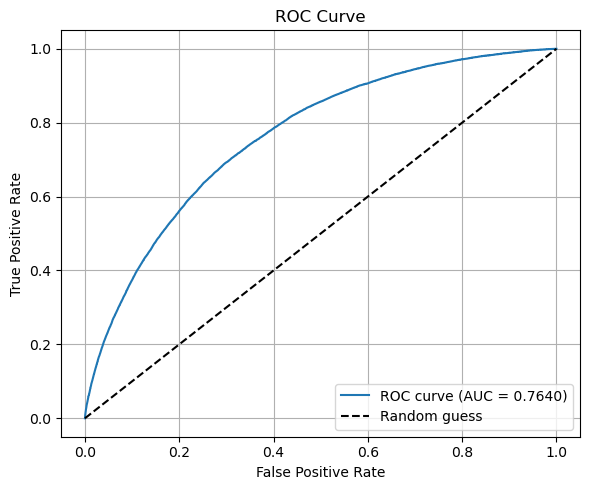

In [305]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

In [307]:
results_df = pd.DataFrame({
    "true_flag": y_test.values,
    "proba": y_pred
})
results_df = results_df.sort_values(by="proba", ascending=False)
results_df = results_df.reset_index(drop=True)

# results_df.to_csv("predictions.csv", index=False)
results_df.head(60)

,true_flag,proba
0,0,0.694
1,0,0.672
2,1,0.668
3,0,0.664
4,1,0.652
5,1,0.644
6,1,0.635
7,0,0.628
8,0,0.624
9,0,0.617


In [61]:
# Build a classification model using LightGBM

# The approach is the same – train the model on the training and validation data, then evaluate the metric on the test data

In [380]:
train_lgb = lgb.Dataset(X_train, label=y_train)
val_lgb = lgb.Dataset(X_val, label=y_val)

params = {
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.14,
    'num_leaves': 32,
    'seed': 42,
    # 'is_unbalance': True,
    # 'n_estimators': 20000,
    'max_depth': 24,
    'reg_lambda': 1,
    # 'min_child_samples': 90
}

lgb_model = lgb.train(
    params,
    train_lgb,
    valid_sets=[val_lgb],
    # num_boost_round=2000,
    # early_stopping_rounds=30,
)

[LightGBM] [Info] Number of positive: 68180, number of negative: 1851820
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.116565 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 56568
[LightGBM] [Info] Number of data points in the train set: 1920000, number of used features: 418
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035510 -> initscore=-3.301773
[LightGBM] [Info] Start training from score -3.301773


In [381]:
# Предсказание и оценка
y_pred = lgb_model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc:.4f}")

AUC: 0.7599


In [384]:
y_pred

array([0.01165361, 0.00250245, 0.03666453, ..., 0.04080892, 0.02684998,
       0.03413218])

In [386]:
print(np.min(y_pred), np.max(y_pred), np.mean(y_pred))

0.0015757517176821568 0.5795946940300131 0.03549917275139254


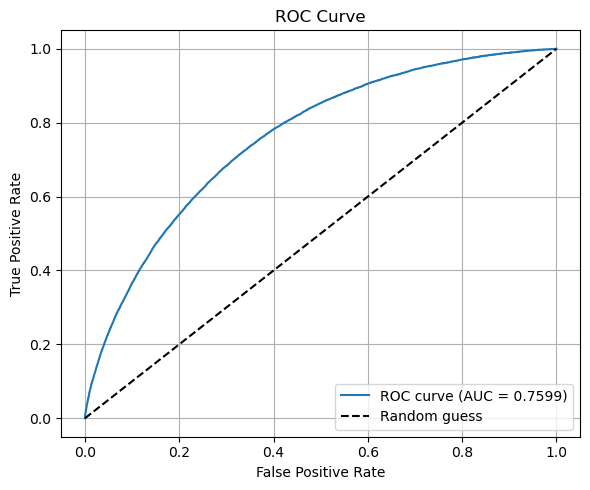

In [388]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

In [63]:
# The best result achieved on the test data was 0.764 in terms of ROC AUC using the CatBoostClassifier model.  
# Interestingly, the class imbalance was not explicitly addressed in the CatBoostClassifier,  
# yet the model was able to learn to distinguish the classes quite well on its own thanks to gradient boosting.